# beijing

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import timedelta
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

def gen_dates(b_date, count):
    hour = timedelta(hours=1)
    for i in range(count+1):
        yield b_date + hour*i


def get_date_list(start=None, end=None):
    """
    获取日期列表
    :param start: 开始日期
    :param end: 结束日期
    :return:
    """
    if start is None:
        start = datetime.strptime("2000-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
    if end is None:
        end = datetime.now()
    data = []
    for d in gen_dates(start, int((end-start).total_seconds()/3600)):
        data.append(str(d))
    return data


Medium_PM10 = 88
Medium_PM25 = 59
Medium_O3   = 56
Medium_NO2  = 46
Medium_CO   = 1
Medium_SO2  = 9
def to_timedict_bj(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('stationId','utc_time','PM2.5','PM10','NO2','CO','O3','SO2'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration']]).tolist()
    for i in tqdm(['aotizhongxin', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihuayuan', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuiku', 'nansanhuan', 'nongzhanguan', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxigong','xizhimenbei','yanqin','yizhuang','yongdingmennei','yongledian','yufa','yungang']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.reset_index(drop=True,inplace=True)
#     recons.loc[recons['stationId'] == 'zhiwuyuan_aq',['PM2.5','PM10','NO2','CO','O3','SO2']] = [Medium_PM25,Medium_PM10,Medium_NO2,Medium_CO,Medium_O3,Medium_SO2]

#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons['PM2.5'].fillna(Medium_PM25, inplace = True)
    recons['PM10'].fillna(Medium_PM10, inplace = True)
    recons['NO2'].fillna(Medium_NO2, inplace = True)
    recons['CO'].fillna(Medium_CO, inplace = True)
    recons['O3'].fillna(Medium_O3, inplace = True)
    recons['SO2'].fillna(Medium_SO2, inplace = True)
    
    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['stationId']=='dongsi_aq',['lon','lat']] = [116.417,39.929]
    recons.loc[recons['stationId']=='tiantan_aq',['lon','lat']] = [116.407,39.886]
    recons.loc[recons['stationId']=='guanyuan_aq',['lon','lat']] = [116.339,39.929]
    recons.loc[recons['stationId']=='wanshouxigong_aq',['lon','lat']] = [116.352,39.878]
    recons.loc[recons['stationId']=='aotizhongxin_aq',['lon','lat']] = [116.397,39.982]
    recons.loc[recons['stationId']=='nongzhanguan_aq',['lon','lat']] = [116.461,39.937]
    recons.loc[recons['stationId']=='wanliu_aq',['lon','lat']] = [116.287,39.987]
    recons.loc[recons['stationId']=='beibuxinqu_aq',['lon','lat']] = [116.174,40.09]
    recons.loc[recons['stationId']=='zhiwuyuan_aq',['lon','lat']] = [116.207,40.002]
    recons.loc[recons['stationId']=='fengtaihuayuan_aq',['lon','lat']] = [116.279,39.863]
    recons.loc[recons['stationId']=='yungang_aq',['lon','lat']] = [116.146,39.824]
    recons.loc[recons['stationId']=='gucheng_aq',['lon','lat']] = [116.184,39.914]
    recons.loc[recons['stationId']=='fangshan_aq',['lon','lat']] = [116.136,39.742]
    recons.loc[recons['stationId']=='daxing_aq',['lon','lat']] = [116.404,39.718]
    recons.loc[recons['stationId']=='yizhuang_aq',['lon','lat']] = [116.506,39.795]
    recons.loc[recons['stationId']=='tongzhou_aq',['lon','lat']] = [116.663,39.886]
    recons.loc[recons['stationId']=='shunyi_aq',['lon','lat']] = [116.655,40.127]
    recons.loc[recons['stationId']=='pingchang_aq',['lon','lat']] = [116.23,40.217]
    recons.loc[recons['stationId']=='mentougou_aq',['lon','lat']] = [116.106,39.937]
    recons.loc[recons['stationId']=='pinggu_aq',['lon','lat']] = [117.1,40.143]
    recons.loc[recons['stationId']=='hureconsou_aq',['lon','lat']] = [116.628,40.328]
    recons.loc[recons['stationId']=='miyun_aq',['lon','lat']] = [116.832,40.37]
    recons.loc[recons['stationId']=='yanqin_aq',['lon','lat']] = [115.972,40.453]
    recons.loc[recons['stationId']=='dingling_aq',['lon','lat']] = [116.22,40.292]
    recons.loc[recons['stationId']=='badaling_aq',['lon','lat']] = [115.988,40.365]
    recons.loc[recons['stationId']=='miyunshuiku_aq',['lon','lat']] = [116.911,40.499]
    recons.loc[recons['stationId']=='donggaocun_aq',['lon','lat']] = [117.12,40.1]
    recons.loc[recons['stationId']=='yongledian_aq',['lon','lat']] = [116.783,39.712]
    recons.loc[recons['stationId']=='yufa_aq',['lon','lat']] = [116.3,39.52]
    recons.loc[recons['stationId']=='liulihe_aq',['lon','lat']] = [116,39.58]
    recons.loc[recons['stationId']=='qianmen_aq',['lon','lat']] = [116.395,39.899]
    recons.loc[recons['stationId']=='yongdingmennei_aq',['lon','lat']] = [116.394,39.876]
    recons.loc[recons['stationId']=='xizhimenbei_aq',['lon','lat']] = [116.349,39.954]
    recons.loc[recons['stationId']=='nansanhuan_aq',['lon','lat']] = [116.368,39.856]
    recons.loc[recons['stationId']=='dongsihuan_aq',['lon','lat']] = [116.483,39.939]
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5','PM10','NO2','CO','O3','SO2']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
        
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 272:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    ######################处理缺失时间点完毕#####################shunyi_meo

    recons_meo = pd.DataFrame(columns=('station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather'))
    
    alt = np.array(meo[['station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    for i in tqdm(['shunyi_meo','hadian_meo','yanqing_meo','miyun_meo','huairou_meo','shangdianzi_meo','pinggu_meo','tongzhou_meo','chaoyang_meo','pingchang_meo','zhaitang_meo','mentougou_meo','beijing_meo','shijingshan_meo','fengtai_meo','daxing_meo','fangshan_meo','xiayunling_meo']):
        count = 0
        for j in meo['station_id']:
            if j == i:
                recons_meo.loc[count] = alt[count]
            count += 1 
    recons_meo.drop_duplicates(inplace=True)
    recons_meo.reset_index(drop=True,inplace=True)
    for i in range(len(recons_meo['wind_speed'])):
        if recons_meo['wind_speed'][i] == 999017:
            recons_meo.loc[i,'wind_speed'] = recons_meo.loc[i-1,'wind_speed']
    recons_meo['longitude'] = 0 ##经度
    recons_meo['latitude'] = 0  ##纬度
    recons_meo.loc[recons_meo['station_id']=='shunyi_meo',['longitude','latitude']] = [116.6153,40.12667]
    recons_meo.loc[recons_meo['station_id']=='haidian_meo',['longitude','latitude']] = [116.2906,39.98694]
    recons_meo.loc[recons_meo['station_id']=='yanqing_meo',['longitude','latitude']] = [115.9689,40.44944]
    recons_meo.loc[recons_meo['station_id']=='miyun_meo',['longitude','latitude']] = [116.8642,40.3775]
    recons_meo.loc[recons_meo['station_id']=='huairou_meo',['longitude','latitude']] = [116.6269,40.35778]
    recons_meo.loc[recons_meo['station_id']=='shangdianzi_meo',['longitude','latitude']] = [117.1117,40.65889]
    recons_meo.loc[recons_meo['station_id']=='pinggu_meo',['longitude','latitude']] = [117.1178,40.16944]
    recons_meo.loc[recons_meo['station_id']=='tongzhou_meo',['longitude','latitude']] = [116.7567,39.8475]
    recons_meo.loc[recons_meo['station_id']=='chaoyang_meo',['longitude','latitude']] = [116.5008,39.9525]
    recons_meo.loc[recons_meo['station_id']=='pingchang_meo',['longitude','latitude']] = [116.2117,40.22333]
    recons_meo.loc[recons_meo['station_id']=='zhaitang_meo',['longitude','latitude']] = [115.6922,39.97389]
    recons_meo.loc[recons_meo['station_id']=='mentougou_meo',['longitude','latitude']] = [116.1564,39.88778]
    recons_meo.loc[recons_meo['station_id']=='beijing_meo',['longitude','latitude']] = [116.4694,39.80611]
    recons_meo.loc[recons_meo['station_id']=='shijingshan_meo',['longitude','latitude']] = [116.2053,39.9425]
    recons_meo.loc[recons_meo['station_id']=='fengtai_meo',['longitude','latitude']] = [116.2453,39.87028]
    recons_meo.loc[recons_meo['station_id']=='daxing_meo',['longitude','latitude']] = [116.3544,39.71861]
    recons_meo.loc[recons_meo['station_id']=='fangshan_meo',['longitude','latitude']] = [116.1942,39.77306]
    recons_meo.loc[recons_meo['station_id']=='xiayunling_meo',['longitude','latitude']] = [115.7406,39.72861]

    recons_meo.loc[recons_meo['weather'] == 'Sunny/clear' , 'weather'] = 0
    recons_meo.loc[recons_meo['weather'] == 'Snow' , 'weather'] = 1
    recons_meo.loc[recons_meo['weather'] == 'Sleet' , 'weather'] = 2
    recons_meo.loc[recons_meo['weather'] == 'Sand' , 'weather'] = 3
    recons_meo.loc[recons_meo['weather'] == 'Rain/Snow with Hail' , 'weather'] = 4
    recons_meo.loc[recons_meo['weather'] == 'Rain with Hail' , 'weather'] = 5
    recons_meo.loc[recons_meo['weather'] == 'Rain' , 'weather'] = 6
    recons_meo.loc[recons_meo['weather'] == 'Haze' , 'weather'] = 7
    recons_meo.loc[recons_meo['weather'] == 'Fog' , 'weather'] = 8
    recons_meo.loc[recons_meo['weather'] == 'Dust' , 'weather'] = 9
    recons_meo.loc[recons_meo['weather'] == 'Hail' , 'weather'] = 4
    recons_meo.loc[recons_meo['weather'] == 'Cloudy' , 'weather'] = 0
    recons_meo.loc[recons_meo['weather'] == 'Overcast' , 'weather'] = 0
    recons_meo.loc[recons_meo['weather'] == 'Thundershower' , 'weather'] = 6
    recons_meo.loc[recons_meo['weather'] == 'Light Rain' , 'weather'] = 6
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    recons_meo['temperature'] = recons_meo['temperature'].apply(div5)
    recons_meo['pressure'] = recons_meo['pressure'].apply(div5)
    recons_meo['humidity'] = recons_meo['humidity'].apply(div5)
    recons_meo['wind_direction'] = recons_meo['wind_direction'].apply(div15)
    recons_meo['wind_speed'] = recons_meo['wind_speed'].apply(div05)
    #############wether量化###############

    #############处理缺失时间点##########
    count = 0
    Idx = 0  ####索引记录####
    meo_list = np.array(recons_meo[['temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    

    for i in tqdm(np.array(recons_meo['time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(meo_list[Idx])

        Idx += 1
        
    length = []  
    
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    ######################处理缺失时间点完毕#####################
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(1150,1181,1):
        for j in range(390,411,1):
            if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                meo_grid.loc[meo_grid['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                 print([i,j])
            count += 1
    
    meo_grid.drop(meo_grid[meo_grid['longitude'] < 115.6].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] > 117.2].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 39.5].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 40.7].index.tolist(),inplace= True)
    meo_grid.drop('id',axis = 1)
    meo_grid.drop_duplicates(inplace=True)
    meo_grid.reset_index(drop=True,inplace=True)
#     print(meo_grid.head(100))
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
    
    
    
    
    count = 1
    Idx = 0  ####索引记录####

    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 9:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1])
            if count > 9:
                for j in range(count-9):
                    alt_dict[i].extend(meo_grid_list[Idx+1])
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
        
        
        
        
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) != 1485:
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
            
            
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(1150,1181,1):
            for j in range(390,411,1):
                if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                    weather_fore.loc[weather_fore['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < 115.6].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 117.2].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 39.5].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 40.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 12093:
            pop_list.append(k)
    print(pop_list)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(12093-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(1485,12093))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))])
            alt_dict[i][1485:12093] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))]).tolist()
        count += 1
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 16
#     win = 168
    
    for i in tqdm(range(68,272)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 271:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,10,11,12]: #####是否为早晚高峰时段（北京转utc时间）
                        alt_dict[alt_frame.index[count]].extend([2])
                    elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [16,17,18,19,20]:
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,6):
            SUM = 0
            for j in range(0,34):
                SUM += alt_dict[k][68+j*6+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0,0,0,0])
        else:
            for m,n in zip(alt_dict[k][-6:] ,alt_dict[hour_last][-12:-6]):
                alt_dict[k].append(m-n)

        hour_last = k
        count += 1
    ##########标签值 PM10 PM2.5 O3##########
#     step = 72  ####预测间隔
    step = 120
    for i in tqdm(range(68,272)):  ##训练数据
        count = 0
        for j in alt_frame[i]:
            if count+step < len(alt_frame[i]) and ((i-68)%6 == 0 or (i-68)%6 == 1 or (i-68)%6 == 4):
                alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
            count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 4973:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i]) <  max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [2]:
Start = datetime.strptime("2018-04-11 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-28 23:00:00", "%Y-%m-%d %H:%M:%S")

pre_dict_bj = to_timedict_bj(start = Start, end = End)
pre_frame_bj = pd.DataFrame.from_dict(pre_dict_bj).T
pre_list_bj = np.array(pre_frame_bj)

  0%|          | 0/18 [00:00<?, ?it/s]

272
272


100%|██████████| 20086/20086 [00:00<00:00, 1679695.15it/s]


380
272
380
380


  0%|          | 0/1152 [00:00<?, ?it/s]

1630
380
1485
380


100%|██████████| 1152/1152 [21:06<00:00,  1.10s/it]


['2018-05-25 21:00:00', '2018-05-20 17:00:00', '2018-05-03 19:00:00', '2018-05-25 18:00:00', '2018-05-05 10:00:00', '2018-04-19 12:00:00', '2018-05-05 21:00:00', '2018-05-20 15:00:00', '2018-05-20 16:00:00', '2018-05-05 11:00:00', '2018-05-05 20:00:00', '2018-05-25 19:00:00', '2018-05-03 18:00:00', '2018-05-20 18:00:00', '2018-05-05 22:00:00', '2018-05-20 20:00:00', '2018-04-19 06:00:00', '2018-05-20 23:00:00', '2018-05-05 19:00:00', '2018-05-05 13:00:00', '2018-05-20 14:00:00', '2018-05-05 16:00:00', '2018-05-25 22:00:00', '2018-04-12 04:00:00', '2018-04-15 13:00:00', '2018-05-20 21:00:00', '2018-04-22 10:00:00', '2018-04-12 05:00:00', '2018-04-18 10:00:00', '2018-05-25 23:00:00', '2018-05-05 18:00:00', '2018-05-03 20:00:00', '2018-05-10 20:00:00', '2018-05-05 23:00:00', '2018-05-05 15:00:00', '2018-05-20 19:00:00', '2018-05-20 22:00:00', '2018-04-15 11:00:00', '2018-05-05 17:00:00', '2018-04-19 07:00:00', '2018-05-25 20:00:00', '2018-05-05 14:00:00', '2018-05-05 12:00:00', '2018-05-0

100%|██████████| 204/204 [00:02<00:00, 90.90it/s]


22002
12207
22002
22002


In [3]:
pre_list_bj.shape

(984, 22002)

In [4]:
pre_frame_bj.index

Index(['2018-04-13 00:00:00', '2018-04-13 01:00:00', '2018-04-13 02:00:00',
       '2018-04-13 03:00:00', '2018-04-13 04:00:00', '2018-04-13 05:00:00',
       '2018-04-13 06:00:00', '2018-04-13 07:00:00', '2018-04-13 08:00:00',
       '2018-04-13 09:00:00',
       ...
       '2018-05-23 14:00:00', '2018-05-23 15:00:00', '2018-05-23 16:00:00',
       '2018-05-23 17:00:00', '2018-05-23 18:00:00', '2018-05-23 19:00:00',
       '2018-05-23 20:00:00', '2018-05-23 21:00:00', '2018-05-23 22:00:00',
       '2018-05-23 23:00:00'],
      dtype='object', length=984)

In [5]:
pre_frame_bj.to_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/bj60.csv')

# London

In [6]:
Medium_PM10 = 13.437369
Medium_PM25 = 20.921357
Medium_O3   = 43.428245

def to_timedict_ld(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid.drop('id',axis=1, inplace = True)
    meo_grid.drop_duplicates(inplace = True)
    meo_grid.reset_index(drop = True, inplace =True)
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('station_id','MeasurementDateGMT','PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration']]).tolist()
    for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.drop_duplicates(inplace = True)
    recons.reset_index(drop=True,inplace=True)
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['station_id'] == 'TH4' , 'NO2 (ug/m3)'])
    recons['PM2.5 (ug/m3)'].fillna(Medium_PM25, inplace = True)
    recons['PM10 (ug/m3)'].fillna(Medium_PM10, inplace = True)
    recons['NO2 (ug/m3)'].fillna(Medium_NO2, inplace = True)

    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='CD9',['lon','lat']] = [-0.129053205,51.52770662]
    recons.loc[recons['station_id']=='CD1',['lon','lat']] = [-0.175284,51.544219]
    recons.loc[recons['station_id']=='GN0',['lon','lat']] = [0.074003,51.490532]
    recons.loc[recons['station_id']=='GR4',['lon','lat']] = [0.070766,51.45258]
    recons.loc[recons['station_id']=='GN3',['lon','lat']] = [0.095111,51.486957]
    recons.loc[recons['station_id']=='GR9',['lon','lat']] = [0.040725,51.456357]
    recons.loc[recons['station_id']=='HV1',['lon','lat']] = [0.205460706,51.52078746]
    recons.loc[recons['station_id']=='KF1',['lon','lat']] = [-0.21349214,51.52104675]
    recons.loc[recons['station_id']=='LW2',['lon','lat']] = [-0.039641,51.474954]
    recons.loc[recons['station_id']=='ST5',['lon','lat']] = [-0.141661525,51.3892869]
    recons.loc[recons['station_id']=='TH4',['lon','lat']] = [-0.008418493,51.51504617]
    recons.loc[recons['station_id']=='MY7',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.15459,51.52254]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))

    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(-20,21,1):
        for j in range(505,526,1):
            if (i >= -4 and i <=3) and (j >= 513 and j <= 517):
                meo_grid.loc[meo_grid['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
            count += 1
#     print(meo_grid)
    meo_grid.drop(meo_grid[meo_grid['longitude'] < -0.4].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] >  0.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 51.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 51.7].index.tolist(),inplace= True)
    meo_grid.reset_index(drop = True,inplace = True)
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
#     print(meo_grid)
    count = 1
    Idx = 0  ####索引记录####
#     print(meo_grid['station_id'][15561])
    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 17:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1]) 
            if count > 17:
                for j in range(count-17):
                    alt_dict[i].extend(meo_grid_list[Idx+1]) 
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 2217:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0])!= 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace=True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(-20,21,1):
            for j in range(505,526,1):
                if (i >= -4 and i <= 3) and (j >= 513 and j <= 517):
                    weather_fore.loc[weather_fore['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < -0.4].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 0.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 51.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 51.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 2185:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(2185-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(265,2185))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))])
            alt_dict[i][265:2185] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))]).tolist()
        count += 1
#     print(alt_frame[62])
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 168

    for i in tqdm(range(26,65)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 64:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
#                     if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [8,9,10,18,19,20]: #####是否为早晚高峰时段（北京转utc时间）
#                         alt_dict[alt_frame.index[count]].extend([2])
#                     elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,3,4,5]:
#                         alt_dict[alt_frame.index[count]].extend([1])
#                     else:
#                         alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,3):
            SUM = 0
            for j in range(0,13):
                SUM += alt_dict[k][26+j*3+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0])
        else:
            for m,n in zip(alt_dict[k][-3:] ,alt_dict[hour_last][-6:-3]):
                alt_dict[k].append(m-n)
        hour_last = k
        count += 1
    ##########标签值 PM10 PM2.5 O3##########
    step = 120
    for i in tqdm(range(26,65)):  ##训练数据
        count = 0
        for j in alt_frame[i]:
            if count+step < len(alt_frame[i]) and ((i-26)%3 == 0 or (i-26)%3 == 1):
                alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
            count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 6092:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
            
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i])<max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [7]:
Start = datetime.strptime("2018-04-12 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-28 23:00:00", "%Y-%m-%d %H:%M:%S")
pre_dict_ld = to_timedict_ld(start = Start, end = End)
pre_frame_ld = pd.DataFrame.from_dict(pre_dict_ld).T
pre_list_ld = np.array(pre_frame_ld)

100%|██████████| 14508/14508 [00:00<00:00, 1864477.81it/s]


65
0
65
65


  0%|          | 0/1128 [00:00<?, ?it/s]

265
65


  0%|          | 0/39 [00:00<?, ?it/s]

2185
65


100%|██████████| 39/39 [00:00<00:00, 78.12it/s]


4091
2217
4091
4091


In [8]:
pre_list_ld.shape

(960, 4091)

In [9]:
pre_frame_ld.index

Index(['2018-04-14 00:00:00', '2018-04-14 01:00:00', '2018-04-14 02:00:00',
       '2018-04-14 03:00:00', '2018-04-14 04:00:00', '2018-04-14 05:00:00',
       '2018-04-14 06:00:00', '2018-04-14 07:00:00', '2018-04-14 08:00:00',
       '2018-04-14 09:00:00',
       ...
       '2018-05-23 14:00:00', '2018-05-23 15:00:00', '2018-05-23 16:00:00',
       '2018-05-23 17:00:00', '2018-05-23 18:00:00', '2018-05-23 19:00:00',
       '2018-05-23 20:00:00', '2018-05-23 21:00:00', '2018-05-23 22:00:00',
       '2018-05-23 23:00:00'],
      dtype='object', length=960)

In [10]:
pre_frame_ld.to_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/ld60.csv')

In [11]:
import pandas as pd
import numpy as np
beijing_train = np.array(pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/bj60.csv'))[:,1:]
London_train = np.array(pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/ld60.csv'))[:,1:]
def sMAPE(preds, xgb_train):   
    s = 0
    label = xgb_train.get_label()
    length = len(label)
    for i in range(length):
        s += float(np.abs(preds[i] - label[i]))/ (float(np.abs(preds[i]) + np.abs(label[i])) / 2.)
    sMAPE = s/float(length)
    return 'sMAPE',float(sMAPE)

# MODEL BJ

In [12]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
# train_data, val_data = train_test_split(beijing_train, test_size = 0.3, random_state = 1)###随机数原始为1
train_data, val_data = beijing_train[:-48,:], beijing_train[-48:,:]###随机数原始为1

/home/lifuzhen/virtual_pytorch_py3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [413]:
a = 64
b= np.abs(a)
print(type(a))
print(type(b))
print(type(float(b)))

<class 'int'>
<class 'numpy.int64'>
<class 'float'>


# PM2.5

  0%|          | 0/34 [00:00<?, ?it/s]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:119.336	val-gamma-nloglik:92.4165	train-sMAPE:1.94087	val-sMAPE:1.86511
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[45]	train-gamma-nloglik:5.51091	val-gamma-nloglik:5.35563	train-sMAPE:0.664032	val-sMAPE:0.696151



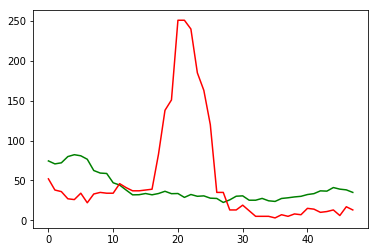

  3%|▎         | 1/34 [00:08<04:40,  8.51s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:108.23	val-gamma-nloglik:133.802	train-sMAPE:1.93446	val-sMAPE:1.88301
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.82607	val-gamma-nloglik:5.60148	train-sMAPE:0.076786	val-sMAPE:0.876407
Stopping. Best iteration:
[83]	train-gamma-nloglik:4.83125	val-gamma-nloglik:5.61885	train-sMAPE:0.108493	val-sMAPE:0.874197



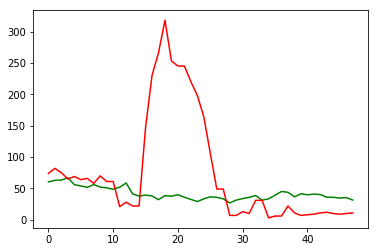

  6%|▌         | 2/34 [00:19<05:09,  9.68s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:102.682	val-gamma-nloglik:70.883	train-sMAPE:1.92558	val-sMAPE:1.79757
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[43]	train-gamma-nloglik:5.3825	val-gamma-nloglik:5.09907	train-sMAPE:0.682454	val-sMAPE:0.772247



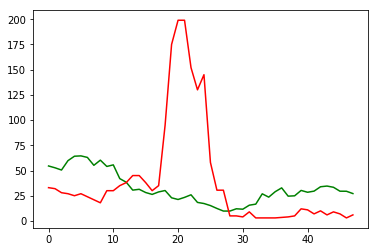

  9%|▉         | 3/34 [00:27<04:44,  9.18s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:109.403	val-gamma-nloglik:77.7696	train-sMAPE:1.93837	val-sMAPE:1.84858
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.86645	val-gamma-nloglik:4.84263	train-sMAPE:0.060751	val-sMAPE:0.791328
Stopping. Best iteration:
[53]	train-gamma-nloglik:5.02165	val-gamma-nloglik:4.94697	train-sMAPE:0.377528	val-sMAPE:0.753966



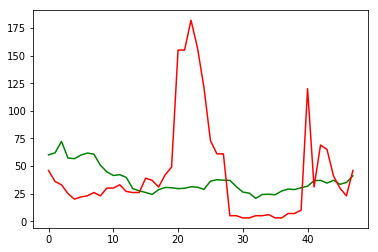

 12%|█▏        | 4/34 [00:37<04:41,  9.37s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:99.345	val-gamma-nloglik:69.1184	train-sMAPE:1.90172	val-sMAPE:1.74062
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[38]	train-gamma-nloglik:5.875	val-gamma-nloglik:6.06955	train-sMAPE:0.858117	val-sMAPE:0.969586



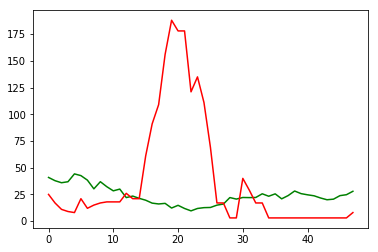

 15%|█▍        | 5/34 [00:49<04:48,  9.95s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:111.567	val-gamma-nloglik:50.6674	train-sMAPE:1.92101	val-sMAPE:1.78372
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.79931	val-gamma-nloglik:4.37517	train-sMAPE:0.072315	val-sMAPE:0.741922
Stopping. Best iteration:
[59]	train-gamma-nloglik:4.88071	val-gamma-nloglik:4.41255	train-sMAPE:0.289431	val-sMAPE:0.693375



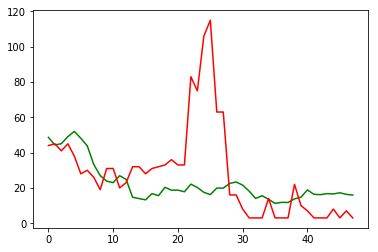

 18%|█▊        | 6/34 [01:03<04:57, 10.62s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:120.461	val-gamma-nloglik:108.279	train-sMAPE:1.93795	val-sMAPE:1.91465
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.94194	val-gamma-nloglik:5.2154	train-sMAPE:0.073914	val-sMAPE:0.63389
Stopping. Best iteration:
[56]	train-gamma-nloglik:5.0642	val-gamma-nloglik:5.33832	train-sMAPE:0.328733	val-sMAPE:0.567603



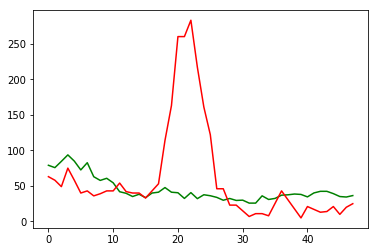

 21%|██        | 7/34 [01:17<04:59, 11.10s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:114.417	val-gamma-nloglik:77.103	train-sMAPE:1.92759	val-sMAPE:1.88043
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.80352	val-gamma-nloglik:4.93137	train-sMAPE:0.06992	val-sMAPE:0.683247
Stopping. Best iteration:
[52]	train-gamma-nloglik:5.03846	val-gamma-nloglik:4.91191	train-sMAPE:0.418209	val-sMAPE:0.58204



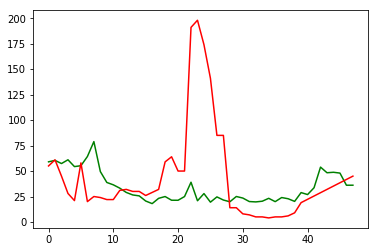

 24%|██▎       | 8/34 [01:31<04:55, 11.38s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:109.211	val-gamma-nloglik:75.2669	train-sMAPE:1.93213	val-sMAPE:1.91033
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.82451	val-gamma-nloglik:4.80791	train-sMAPE:0.067628	val-sMAPE:0.608548
Stopping. Best iteration:
[56]	train-gamma-nloglik:4.93269	val-gamma-nloglik:4.84405	train-sMAPE:0.311567	val-sMAPE:0.545095



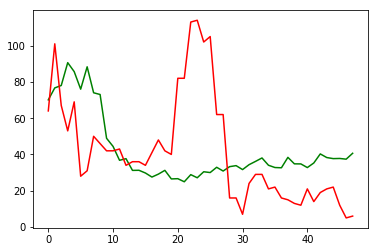

 26%|██▋       | 9/34 [01:43<04:46, 11.47s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:135.318	val-gamma-nloglik:95.4596	train-sMAPE:1.94723	val-sMAPE:1.87452
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[47]	train-gamma-nloglik:5.58161	val-gamma-nloglik:5.37116	train-sMAPE:0.640788	val-sMAPE:0.754251



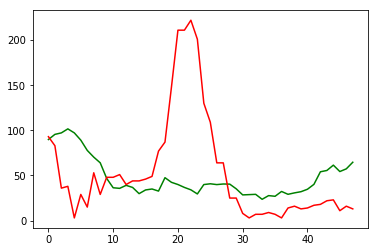

 29%|██▉       | 10/34 [01:51<04:28, 11.18s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:120.665	val-gamma-nloglik:114.248	train-sMAPE:1.93987	val-sMAPE:1.86319
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.92988	val-gamma-nloglik:5.88709	train-sMAPE:0.080662	val-sMAPE:0.949369
Stopping. Best iteration:
[55]	train-gamma-nloglik:5.07049	val-gamma-nloglik:6.1769	train-sMAPE:0.352508	val-sMAPE:0.891782



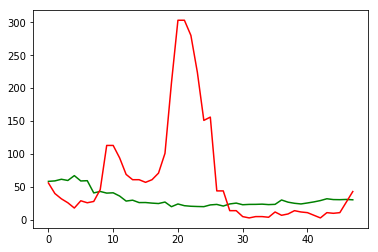

 32%|███▏      | 11/34 [02:00<04:12, 10.96s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:127.233	val-gamma-nloglik:82.1562	train-sMAPE:1.94572	val-sMAPE:1.91014
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[46]	train-gamma-nloglik:5.54976	val-gamma-nloglik:5.12558	train-sMAPE:0.651226	val-sMAPE:0.630797



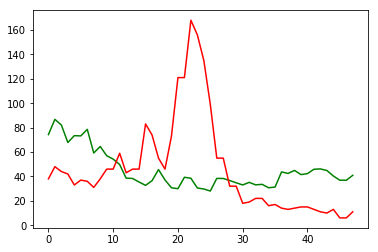

 35%|███▌      | 12/34 [02:08<03:56, 10.74s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:102.767	val-gamma-nloglik:73.4698	train-sMAPE:1.92063	val-sMAPE:1.80794
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.7222	val-gamma-nloglik:5.03025	train-sMAPE:0.065171	val-sMAPE:0.960733
Stopping. Best iteration:
[60]	train-gamma-nloglik:4.78526	val-gamma-nloglik:4.92031	train-sMAPE:0.245967	val-sMAPE:0.85862



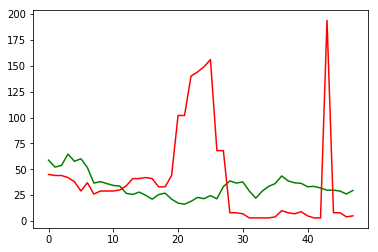

 38%|███▊      | 13/34 [02:17<03:42, 10.61s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:132.9	val-gamma-nloglik:66.3076	train-sMAPE:1.93036	val-sMAPE:1.87603
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.97664	val-gamma-nloglik:4.65226	train-sMAPE:0.065059	val-sMAPE:0.666104
Stopping. Best iteration:
[56]	train-gamma-nloglik:5.11837	val-gamma-nloglik:4.67627	train-sMAPE:0.363376	val-sMAPE:0.610481



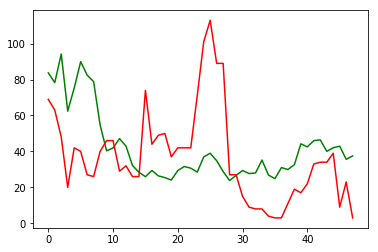

 41%|████      | 14/34 [02:26<03:29, 10.49s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:110.625	val-gamma-nloglik:25.2261	train-sMAPE:1.93244	val-sMAPE:1.77288
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[32]	train-gamma-nloglik:7.80426	val-gamma-nloglik:3.65727	train-sMAPE:1.17433	val-sMAPE:0.493499



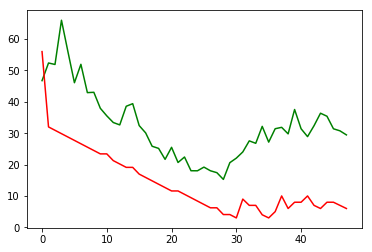

 44%|████▍     | 15/34 [02:34<03:15, 10.29s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:109.772	val-gamma-nloglik:104.114	train-sMAPE:1.92453	val-sMAPE:1.77413
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.77665	val-gamma-nloglik:5.26626	train-sMAPE:0.072539	val-sMAPE:0.939518
Stopping. Best iteration:
[60]	train-gamma-nloglik:4.85502	val-gamma-nloglik:5.29207	train-sMAPE:0.272787	val-sMAPE:0.871055



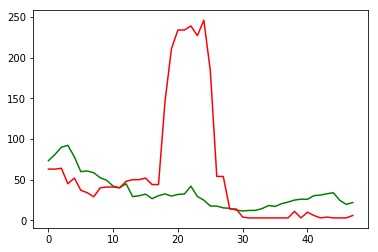

 47%|████▋     | 16/34 [02:43<03:04, 10.24s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:94.7997	val-gamma-nloglik:67.1451	train-sMAPE:1.91563	val-sMAPE:1.82763
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.63869	val-gamma-nloglik:4.66782	train-sMAPE:0.067983	val-sMAPE:0.79669
Stopping. Best iteration:
[51]	train-gamma-nloglik:4.83646	val-gamma-nloglik:4.74628	train-sMAPE:0.40233	val-sMAPE:0.717162



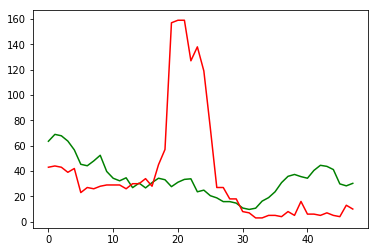

 50%|█████     | 17/34 [02:56<02:56, 10.38s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:106.541	val-gamma-nloglik:73.0172	train-sMAPE:1.92718	val-sMAPE:1.87476
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[38]	train-gamma-nloglik:6.09333	val-gamma-nloglik:5.57294	train-sMAPE:0.882903	val-sMAPE:0.634891



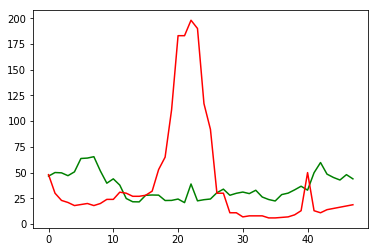

 53%|█████▎    | 18/34 [03:08<02:47, 10.48s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:111.957	val-gamma-nloglik:71.7794	train-sMAPE:1.93495	val-sMAPE:1.87596
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.87113	val-gamma-nloglik:4.73031	train-sMAPE:0.067556	val-sMAPE:0.726104
Stopping. Best iteration:
[51]	train-gamma-nloglik:5.09224	val-gamma-nloglik:4.796	train-sMAPE:0.432801	val-sMAPE:0.618323



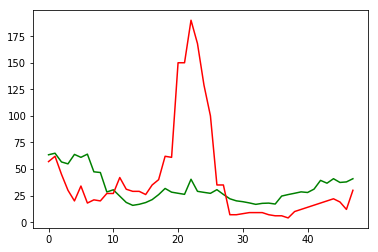

 56%|█████▌    | 19/34 [03:21<02:38, 10.60s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:104.435	val-gamma-nloglik:89.2678	train-sMAPE:1.92074	val-sMAPE:1.82953
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[43]	train-gamma-nloglik:5.40124	val-gamma-nloglik:5.60013	train-sMAPE:0.680572	val-sMAPE:0.889604



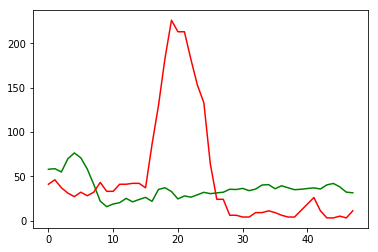

 59%|█████▉    | 20/34 [03:33<02:29, 10.67s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:108.128	val-gamma-nloglik:44.4234	train-sMAPE:1.93204	val-sMAPE:1.83838
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[46]	train-gamma-nloglik:5.26279	val-gamma-nloglik:4.21754	train-sMAPE:0.585723	val-sMAPE:0.560907



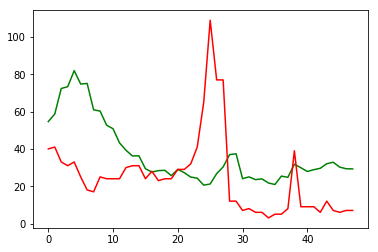

 62%|██████▏   | 21/34 [03:44<02:19, 10.71s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:111.514	val-gamma-nloglik:75.3056	train-sMAPE:1.91388	val-sMAPE:1.86342
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[48]	train-gamma-nloglik:5.13976	val-gamma-nloglik:5.10323	train-sMAPE:0.529985	val-sMAPE:0.713364



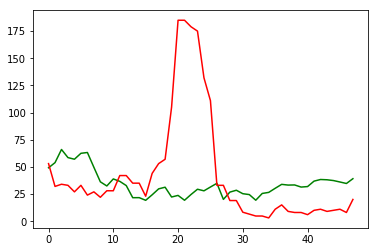

 65%|██████▍   | 22/34 [03:53<02:07, 10.62s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:119.329	val-gamma-nloglik:86.2855	train-sMAPE:1.93801	val-sMAPE:1.8796
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.9119	val-gamma-nloglik:5.10888	train-sMAPE:0.069199	val-sMAPE:0.712122
Stopping. Best iteration:
[56]	train-gamma-nloglik:5.03845	val-gamma-nloglik:5.15614	train-sMAPE:0.33634	val-sMAPE:0.633883



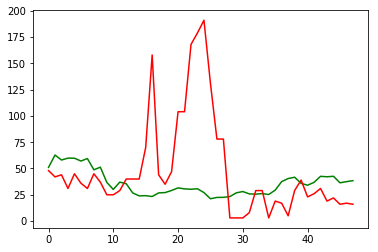

 68%|██████▊   | 23/34 [04:02<01:55, 10.54s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:107.389	val-gamma-nloglik:76.996	train-sMAPE:1.9387	val-sMAPE:1.86737
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[45]	train-gamma-nloglik:5.34174	val-gamma-nloglik:4.99425	train-sMAPE:0.619826	val-sMAPE:0.620493



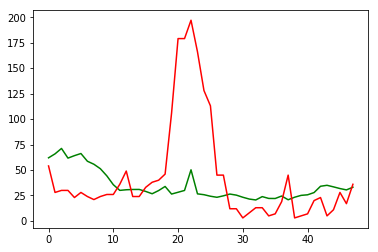

 71%|███████   | 24/34 [04:10<01:44, 10.44s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:115.407	val-gamma-nloglik:80.1962	train-sMAPE:1.93891	val-sMAPE:1.92863
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.92793	val-gamma-nloglik:4.79438	train-sMAPE:0.062956	val-sMAPE:0.508952
Stopping. Best iteration:
[57]	train-gamma-nloglik:5.0248	val-gamma-nloglik:4.84698	train-sMAPE:0.295886	val-sMAPE:0.443757



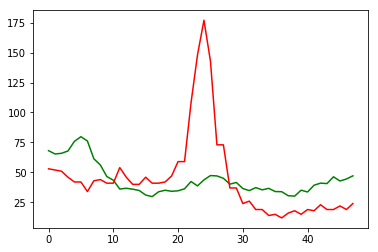

 74%|███████▎  | 25/34 [04:21<01:34, 10.47s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:111.337	val-gamma-nloglik:90.3642	train-sMAPE:1.92863	val-sMAPE:1.8745
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[48]	train-gamma-nloglik:5.17076	val-gamma-nloglik:5.6509	train-sMAPE:0.523399	val-sMAPE:0.74125



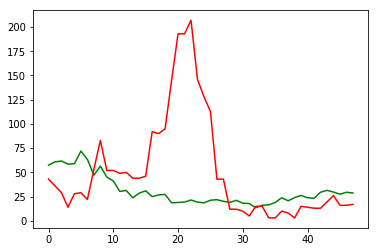

 76%|███████▋  | 26/34 [04:34<01:24, 10.58s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:113.818	val-gamma-nloglik:70.8078	train-sMAPE:1.93497	val-sMAPE:1.84913
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[47]	train-gamma-nloglik:5.28604	val-gamma-nloglik:4.89356	train-sMAPE:0.575878	val-sMAPE:0.634651



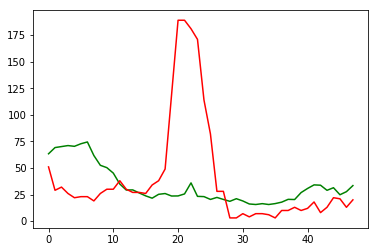

 79%|███████▉  | 27/34 [04:47<01:14, 10.66s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:132.129	val-gamma-nloglik:86.1534	train-sMAPE:1.94602	val-sMAPE:1.8877
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[45]	train-gamma-nloglik:5.6917	val-gamma-nloglik:5.40723	train-sMAPE:0.709282	val-sMAPE:0.695884



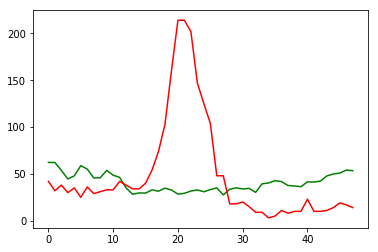

 82%|████████▏ | 28/34 [05:00<01:04, 10.73s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:118.78	val-gamma-nloglik:243.097	train-sMAPE:1.93621	val-sMAPE:1.83181
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.90265	val-gamma-nloglik:8.97119	train-sMAPE:0.070085	val-sMAPE:0.996944
Stopping. Best iteration:
[106]	train-gamma-nloglik:4.90165	val-gamma-nloglik:8.97489	train-sMAPE:0.060458	val-sMAPE:0.995724



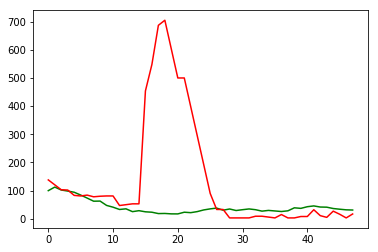

 85%|████████▌ | 29/34 [05:17<00:54, 10.95s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:106.905	val-gamma-nloglik:138.634	train-sMAPE:1.93413	val-sMAPE:1.89357
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.83412	val-gamma-nloglik:6.07553	train-sMAPE:0.062043	val-sMAPE:0.927014
Stopping. Best iteration:
[69]	train-gamma-nloglik:4.85423	val-gamma-nloglik:6.08985	train-sMAPE:0.160714	val-sMAPE:0.923891



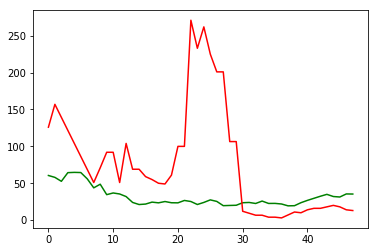

 88%|████████▊ | 30/34 [05:32<00:44, 11.09s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:106.091	val-gamma-nloglik:45.3488	train-sMAPE:1.90474	val-sMAPE:1.84864
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.69576	val-gamma-nloglik:4.37807	train-sMAPE:0.078067	val-sMAPE:0.708833
Stopping. Best iteration:
[51]	train-gamma-nloglik:4.9243	val-gamma-nloglik:4.51495	train-sMAPE:0.440996	val-sMAPE:0.607015



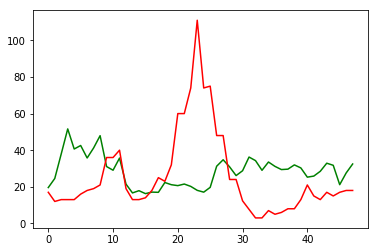

 91%|█████████ | 31/34 [05:44<00:33, 11.11s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:125.226	val-gamma-nloglik:91.1582	train-sMAPE:1.94856	val-sMAPE:1.94361
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.03952	val-gamma-nloglik:5.05141	train-sMAPE:0.064862	val-sMAPE:0.439874
Stopping. Best iteration:
[70]	train-gamma-nloglik:5.05852	val-gamma-nloglik:5.04924	train-sMAPE:0.15538	val-sMAPE:0.413857



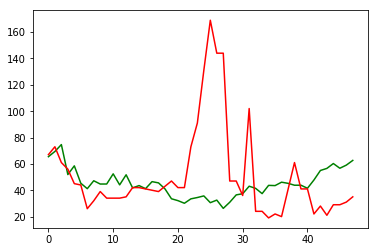

 94%|█████████▍| 32/34 [05:54<00:22, 11.07s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:121.995	val-gamma-nloglik:82.2645	train-sMAPE:1.94366	val-sMAPE:1.87645
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.97479	val-gamma-nloglik:4.84114	train-sMAPE:0.06169	val-sMAPE:0.649734
Stopping. Best iteration:
[57]	train-gamma-nloglik:5.07795	val-gamma-nloglik:4.88005	train-sMAPE:0.311218	val-sMAPE:0.635302



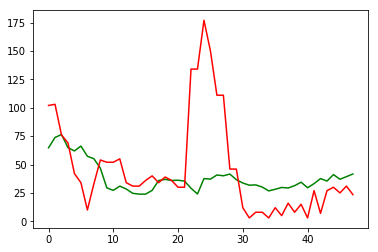

 97%|█████████▋| 33/34 [06:06<00:11, 11.12s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:103.128	val-gamma-nloglik:74.5957	train-sMAPE:1.90806	val-sMAPE:1.87629
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.67354	val-gamma-nloglik:4.77167	train-sMAPE:0.080968	val-sMAPE:0.768891
Stopping. Best iteration:
[52]	train-gamma-nloglik:4.8792	val-gamma-nloglik:4.90532	train-sMAPE:0.425833	val-sMAPE:0.700033



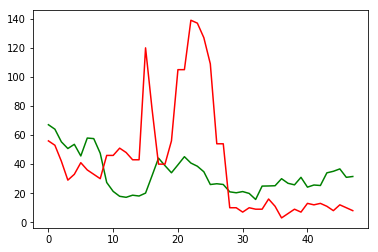

100%|██████████| 34/34 [06:19<00:00, 11.15s/it]


In [13]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+288*i:12093+288*(i+1)],train_data[:,-117:-102]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+288*i:12093+288*(i+1)],val_data[:,-117:-102]),axis = 1)
    trainY = train_data[:, -102+3*i]
    valY = val_data[:, -102+3*i]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)

    params={
#     'tree_method':'hist',
    'booster': 'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':1, # 随机采样训练样本
    'colsample_bytree':0.1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
    #     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst ,xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/bj60/'+ str(i) +'_PM2.5.model') # 用于存储训练出的模型

# PM10

  0%|          | 0/34 [00:00<?, ?it/s]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:190.605	val-gamma-nloglik:365.104	train-sMAPE:1.96615	val-sMAPE:1.96765
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.45125	val-gamma-nloglik:7.15466	train-sMAPE:0.068704	val-sMAPE:0.693874
Stopping. Best iteration:
[87]	train-gamma-nloglik:5.45504	val-gamma-nloglik:7.18689	train-sMAPE:0.094981	val-sMAPE:0.688514



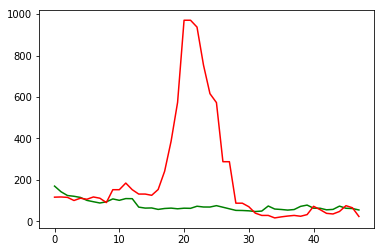

  3%|▎         | 1/34 [00:15<08:15, 15.02s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:245.596	val-gamma-nloglik:471.812	train-sMAPE:1.96939	val-sMAPE:1.97622
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.62756	val-gamma-nloglik:7.1535	train-sMAPE:0.098533	val-sMAPE:0.624804
Stopping. Best iteration:
[85]	train-gamma-nloglik:5.63875	val-gamma-nloglik:7.19987	train-sMAPE:0.145995	val-sMAPE:0.621772



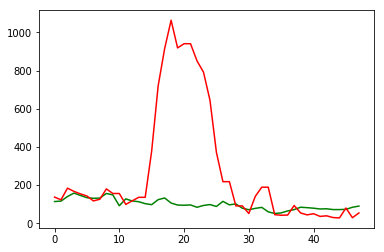

  6%|▌         | 2/34 [00:30<08:00, 15.01s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:246.831	val-gamma-nloglik:386.572	train-sMAPE:1.97032	val-sMAPE:1.95998
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.68133	val-gamma-nloglik:6.94047	train-sMAPE:0.076405	val-sMAPE:0.62004
Stopping. Best iteration:
[108]	train-gamma-nloglik:5.67995	val-gamma-nloglik:6.92835	train-sMAPE:0.066646	val-sMAPE:0.617567



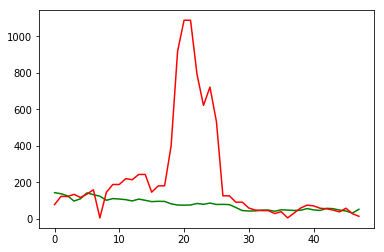

  9%|▉         | 3/34 [00:46<08:01, 15.52s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:249.272	val-gamma-nloglik:431.367	train-sMAPE:1.97307	val-sMAPE:1.9805
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.71539	val-gamma-nloglik:8.09371	train-sMAPE:0.065646	val-sMAPE:0.598944
Stopping. Best iteration:
[95]	train-gamma-nloglik:5.71668	val-gamma-nloglik:8.07167	train-sMAPE:0.073743	val-sMAPE:0.584273



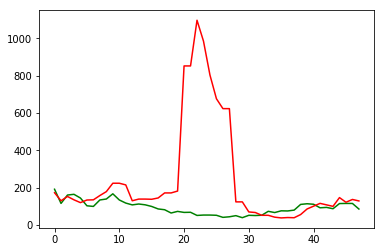

 12%|█▏        | 4/34 [01:02<07:45, 15.53s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:176.883	val-gamma-nloglik:385.757	train-sMAPE:1.95828	val-sMAPE:1.95239
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.30751	val-gamma-nloglik:7.07306	train-sMAPE:0.070466	val-sMAPE:0.712332
Stopping. Best iteration:
[102]	train-gamma-nloglik:5.30721	val-gamma-nloglik:7.07086	train-sMAPE:0.067959	val-sMAPE:0.711159



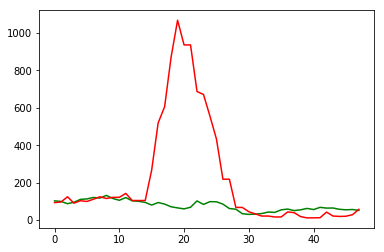

 15%|█▍        | 5/34 [01:18<07:33, 15.65s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:172.259	val-gamma-nloglik:198.035	train-sMAPE:1.9581	val-sMAPE:1.93439
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.29109	val-gamma-nloglik:6.18306	train-sMAPE:0.055999	val-sMAPE:0.738178
Stopping. Best iteration:
[85]	train-gamma-nloglik:5.29476	val-gamma-nloglik:6.19796	train-sMAPE:0.086584	val-sMAPE:0.736848



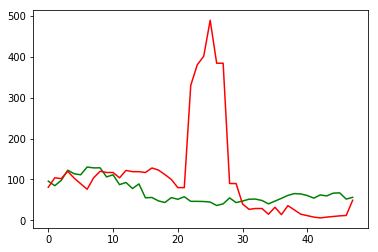

 18%|█▊        | 6/34 [01:32<07:13, 15.47s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:212.133	val-gamma-nloglik:424.921	train-sMAPE:1.96622	val-sMAPE:1.9768
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.52682	val-gamma-nloglik:8.02022	train-sMAPE:0.073423	val-sMAPE:0.608804
Stopping. Best iteration:
[110]	train-gamma-nloglik:5.52529	val-gamma-nloglik:8.00234	train-sMAPE:0.059695	val-sMAPE:0.601181



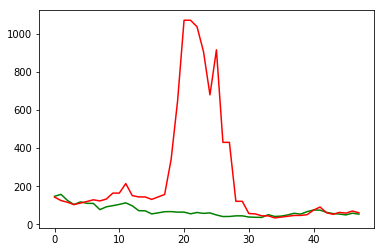

 21%|██        | 7/34 [01:47<06:54, 15.34s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:256.295	val-gamma-nloglik:301.546	train-sMAPE:1.97696	val-sMAPE:1.97471
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.77683	val-gamma-nloglik:6.34176	train-sMAPE:0.072636	val-sMAPE:0.531923
Stopping. Best iteration:
[71]	train-gamma-nloglik:5.81571	val-gamma-nloglik:6.36994	train-sMAPE:0.207892	val-sMAPE:0.513037



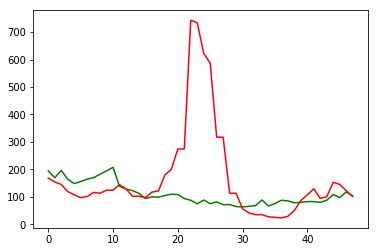

 24%|██▎       | 8/34 [01:57<06:20, 14.64s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:245.344	val-gamma-nloglik:341.831	train-sMAPE:1.97114	val-sMAPE:1.97571
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.69295	val-gamma-nloglik:7.13779	train-sMAPE:0.06141	val-sMAPE:0.738256
[200]	train-gamma-nloglik:5.68997	val-gamma-nloglik:7.14132	train-sMAPE:0.017599	val-sMAPE:0.733867
Stopping. Best iteration:
[166]	train-gamma-nloglik:5.69016	val-gamma-nloglik:7.13601	train-sMAPE:0.023	val-sMAPE:0.732552



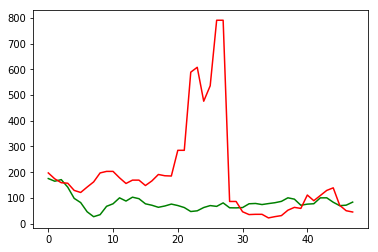

 26%|██▋       | 9/34 [02:12<06:08, 14.72s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:251.474	val-gamma-nloglik:361.098	train-sMAPE:1.9706	val-sMAPE:1.97184
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.67258	val-gamma-nloglik:7.41788	train-sMAPE:0.081981	val-sMAPE:0.694327
Stopping. Best iteration:
[70]	train-gamma-nloglik:5.71893	val-gamma-nloglik:7.60975	train-sMAPE:0.227887	val-sMAPE:0.674585



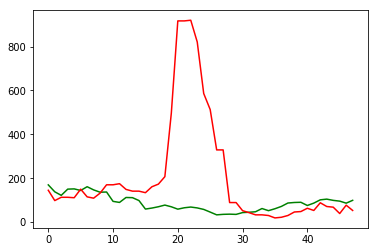

 29%|██▉       | 10/34 [02:22<05:41, 14.22s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:228.761	val-gamma-nloglik:374.695	train-sMAPE:1.97033	val-sMAPE:1.97003
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.62273	val-gamma-nloglik:8.18543	train-sMAPE:0.064736	val-sMAPE:0.785161
Stopping. Best iteration:
[62]	train-gamma-nloglik:5.73569	val-gamma-nloglik:8.53505	train-sMAPE:0.344081	val-sMAPE:0.758801



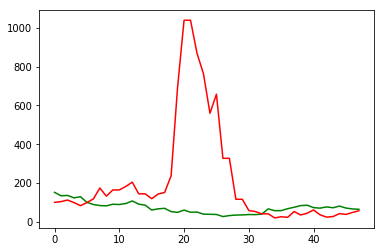

 32%|███▏      | 11/34 [02:31<05:16, 13.77s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:191.672	val-gamma-nloglik:214.155	train-sMAPE:1.96628	val-sMAPE:1.95328
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.45731	val-gamma-nloglik:6.06845	train-sMAPE:0.064359	val-sMAPE:0.696065
Stopping. Best iteration:
[75]	train-gamma-nloglik:5.47197	val-gamma-nloglik:6.09608	train-sMAPE:0.142304	val-sMAPE:0.688791



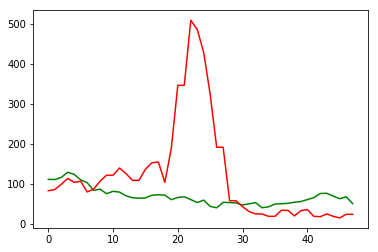

 35%|███▌      | 12/34 [02:41<04:56, 13.48s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:197.831	val-gamma-nloglik:262.185	train-sMAPE:1.96299	val-sMAPE:1.94086
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.43273	val-gamma-nloglik:6.36233	train-sMAPE:0.071516	val-sMAPE:0.770784
Stopping. Best iteration:
[80]	train-gamma-nloglik:5.44336	val-gamma-nloglik:6.34322	train-sMAPE:0.124069	val-sMAPE:0.757692



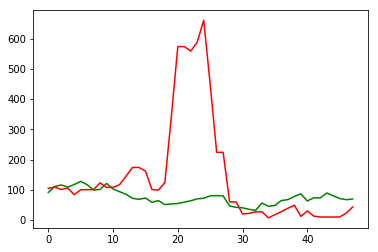

 38%|███▊      | 13/34 [02:53<04:39, 13.33s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:265.978	val-gamma-nloglik:366.413	train-sMAPE:1.96906	val-sMAPE:1.98293
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.71657	val-gamma-nloglik:6.79192	train-sMAPE:0.085146	val-sMAPE:0.72684
Stopping. Best iteration:
[103]	train-gamma-nloglik:5.71593	val-gamma-nloglik:6.79138	train-sMAPE:0.081486	val-sMAPE:0.723471



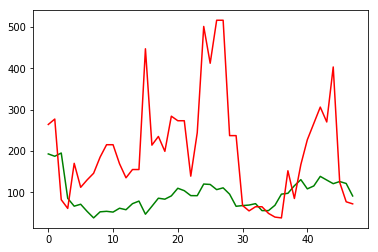

 41%|████      | 14/34 [03:11<04:33, 13.66s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:208.031	val-gamma-nloglik:90.2505	train-sMAPE:1.96868	val-sMAPE:1.92662
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.52382	val-gamma-nloglik:4.98013	train-sMAPE:0.067735	val-sMAPE:0.706697
Stopping. Best iteration:
[52]	train-gamma-nloglik:5.97559	val-gamma-nloglik:4.84277	train-sMAPE:0.622859	val-sMAPE:0.482225



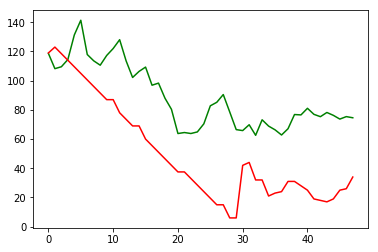

 44%|████▍     | 15/34 [03:25<04:19, 13.68s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:189.33	val-gamma-nloglik:241.711	train-sMAPE:1.95982	val-sMAPE:1.95314
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.37291	val-gamma-nloglik:6.97553	train-sMAPE:0.077249	val-sMAPE:0.729808
Stopping. Best iteration:
[87]	train-gamma-nloglik:5.3775	val-gamma-nloglik:6.93687	train-sMAPE:0.105969	val-sMAPE:0.723817



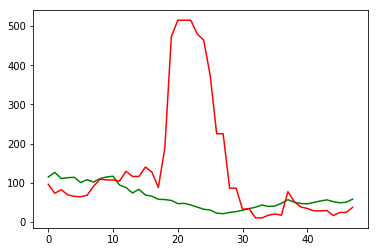

 47%|████▋     | 16/34 [03:42<04:10, 13.89s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:181.284	val-gamma-nloglik:307.564	train-sMAPE:1.95579	val-sMAPE:1.94763
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.27934	val-gamma-nloglik:10.0382	train-sMAPE:0.070988	val-sMAPE:0.829306
Stopping. Best iteration:
[71]	train-gamma-nloglik:5.30787	val-gamma-nloglik:10.2133	train-sMAPE:0.181375	val-sMAPE:0.821814



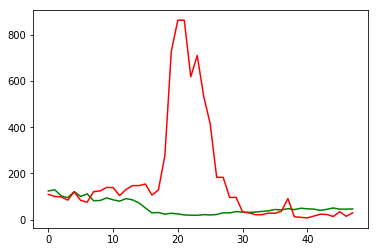

 50%|█████     | 17/34 [03:57<03:57, 13.97s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:257.582	val-gamma-nloglik:335.923	train-sMAPE:1.97608	val-sMAPE:1.97461
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.79047	val-gamma-nloglik:6.79364	train-sMAPE:0.069108	val-sMAPE:0.617233
Stopping. Best iteration:
[98]	train-gamma-nloglik:5.79079	val-gamma-nloglik:6.79122	train-sMAPE:0.071823	val-sMAPE:0.61661



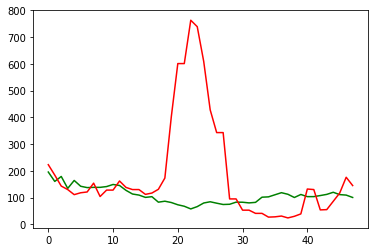

 53%|█████▎    | 18/34 [04:15<03:47, 14.19s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:216.451	val-gamma-nloglik:271.802	train-sMAPE:1.96877	val-sMAPE:1.9615
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.56804	val-gamma-nloglik:6.594	train-sMAPE:0.073951	val-sMAPE:0.664492
Stopping. Best iteration:
[127]	train-gamma-nloglik:5.56522	val-gamma-nloglik:6.59442	train-sMAPE:0.048503	val-sMAPE:0.660769



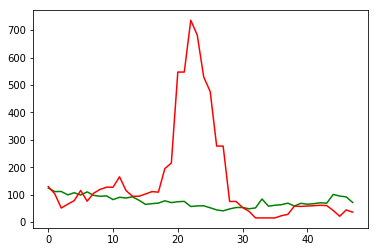

 56%|█████▌    | 19/34 [04:31<03:34, 14.28s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:208.703	val-gamma-nloglik:413.231	train-sMAPE:1.96459	val-sMAPE:1.9601
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.49029	val-gamma-nloglik:7.83336	train-sMAPE:0.069798	val-sMAPE:0.675836
[200]	train-gamma-nloglik:5.48641	val-gamma-nloglik:7.7923	train-sMAPE:0.021945	val-sMAPE:0.669811
Stopping. Best iteration:
[168]	train-gamma-nloglik:5.48672	val-gamma-nloglik:7.77172	train-sMAPE:0.02917	val-sMAPE:0.666743



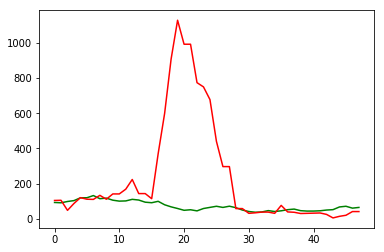

 59%|█████▉    | 20/34 [04:46<03:20, 14.35s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:167.988	val-gamma-nloglik:156.699	train-sMAPE:1.96161	val-sMAPE:1.9445
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.2972	val-gamma-nloglik:5.61269	train-sMAPE:0.062455	val-sMAPE:0.676553
Stopping. Best iteration:
[69]	train-gamma-nloglik:5.32573	val-gamma-nloglik:5.64759	train-sMAPE:0.181548	val-sMAPE:0.662952



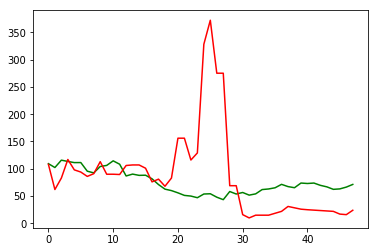

 62%|██████▏   | 21/34 [04:56<03:03, 14.12s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:226.582	val-gamma-nloglik:342.053	train-sMAPE:1.96865	val-sMAPE:1.96725
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.61467	val-gamma-nloglik:7.37202	train-sMAPE:0.068545	val-sMAPE:0.762639
Stopping. Best iteration:
[93]	train-gamma-nloglik:5.6161	val-gamma-nloglik:7.37339	train-sMAPE:0.07997	val-sMAPE:0.76191



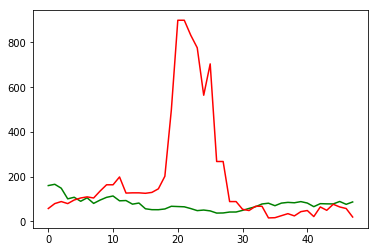

 65%|██████▍   | 22/34 [05:07<02:47, 13.99s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:206.95	val-gamma-nloglik:289.742	train-sMAPE:1.96543	val-sMAPE:1.97041
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.48822	val-gamma-nloglik:7.20101	train-sMAPE:0.073598	val-sMAPE:0.630296
Stopping. Best iteration:
[126]	train-gamma-nloglik:5.48526	val-gamma-nloglik:7.21608	train-sMAPE:0.048335	val-sMAPE:0.629263



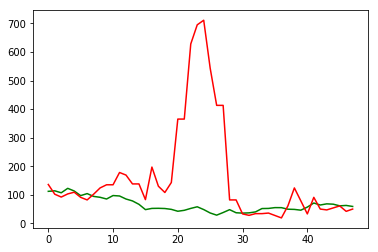

 68%|██████▊   | 23/34 [05:20<02:33, 13.95s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:203.321	val-gamma-nloglik:295.531	train-sMAPE:1.96961	val-sMAPE:1.96201
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.523	val-gamma-nloglik:6.57282	train-sMAPE:0.069544	val-sMAPE:0.638608
Stopping. Best iteration:
[144]	train-gamma-nloglik:5.51968	val-gamma-nloglik:6.54852	train-sMAPE:0.038176	val-sMAPE:0.633458



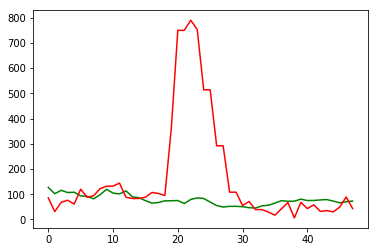

 71%|███████   | 24/34 [05:35<02:19, 13.97s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:244.012	val-gamma-nloglik:343.162	train-sMAPE:1.97029	val-sMAPE:1.97602
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.6746	val-gamma-nloglik:7.14153	train-sMAPE:0.070658	val-sMAPE:0.592746
[200]	train-gamma-nloglik:5.67028	val-gamma-nloglik:7.20753	train-sMAPE:0.020541	val-sMAPE:0.588942
Stopping. Best iteration:
[249]	train-gamma-nloglik:5.6701	val-gamma-nloglik:7.21048	train-sMAPE:0.014137	val-sMAPE:0.587807



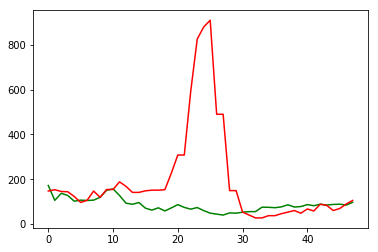

 74%|███████▎  | 25/34 [05:55<02:08, 14.23s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:213.587	val-gamma-nloglik:344.991	train-sMAPE:1.96826	val-sMAPE:1.97239
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.55419	val-gamma-nloglik:7.70641	train-sMAPE:0.066231	val-sMAPE:0.701456
[200]	train-gamma-nloglik:5.55079	val-gamma-nloglik:7.69697	train-sMAPE:0.021572	val-sMAPE:0.693055
[300]	train-gamma-nloglik:5.55051	val-gamma-nloglik:7.69396	train-sMAPE:0.010453	val-sMAPE:0.691017
Stopping. Best iteration:
[308]	train-gamma-nloglik:5.55049	val-gamma-nloglik:7.69464	train-sMAPE:0.009673	val-sMAPE:0.690435



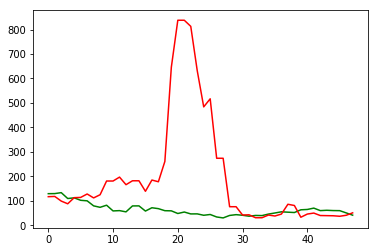

 76%|███████▋  | 26/34 [06:19<01:56, 14.60s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:247.124	val-gamma-nloglik:392.723	train-sMAPE:1.97382	val-sMAPE:1.9727
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.70884	val-gamma-nloglik:7.25054	train-sMAPE:0.085302	val-sMAPE:0.683772
Stopping. Best iteration:
[117]	train-gamma-nloglik:5.70659	val-gamma-nloglik:7.24247	train-sMAPE:0.06855	val-sMAPE:0.675421



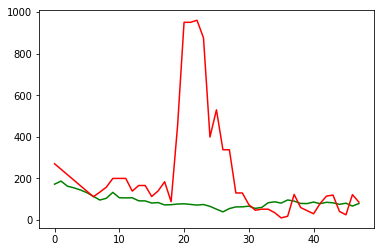

 79%|███████▉  | 27/34 [06:32<01:41, 14.53s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:225.628	val-gamma-nloglik:350.619	train-sMAPE:1.97209	val-sMAPE:1.96846
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.62766	val-gamma-nloglik:6.83846	train-sMAPE:0.065356	val-sMAPE:0.655944
Stopping. Best iteration:
[72]	train-gamma-nloglik:5.65183	val-gamma-nloglik:6.99889	train-sMAPE:0.176497	val-sMAPE:0.650976



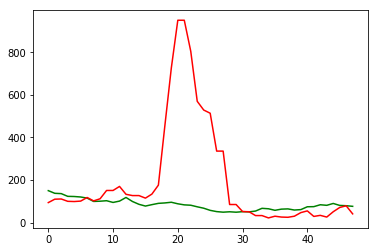

 82%|████████▏ | 28/34 [06:42<01:26, 14.36s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:216.592	val-gamma-nloglik:416.422	train-sMAPE:1.96778	val-sMAPE:1.96442
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.54812	val-gamma-nloglik:9.11027	train-sMAPE:0.065144	val-sMAPE:0.810383
Stopping. Best iteration:
[131]	train-gamma-nloglik:5.54579	val-gamma-nloglik:9.12595	train-sMAPE:0.03858	val-sMAPE:0.80819



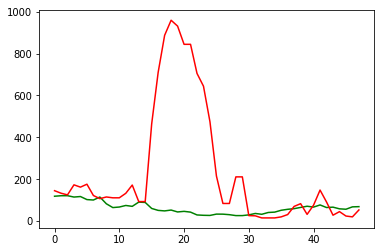

 85%|████████▌ | 29/34 [06:55<01:11, 14.32s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:186.294	val-gamma-nloglik:261.717	train-sMAPE:1.9664	val-sMAPE:1.96073
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.43486	val-gamma-nloglik:6.84189	train-sMAPE:0.056283	val-sMAPE:0.597164
[200]	train-gamma-nloglik:5.4325	val-gamma-nloglik:6.81443	train-sMAPE:0.017006	val-sMAPE:0.5869
Stopping. Best iteration:
[152]	train-gamma-nloglik:5.4328	val-gamma-nloglik:6.81088	train-sMAPE:0.025802	val-sMAPE:0.58602



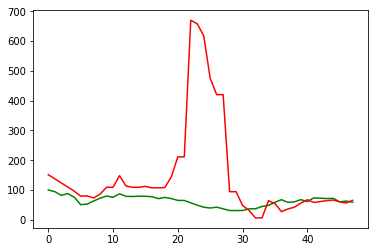

 88%|████████▊ | 30/34 [07:09<00:57, 14.33s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:220.284	val-gamma-nloglik:326.287	train-sMAPE:1.97134	val-sMAPE:1.96843
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.60677	val-gamma-nloglik:7.08378	train-sMAPE:0.066293	val-sMAPE:0.66823
Stopping. Best iteration:
[76]	train-gamma-nloglik:5.62196	val-gamma-nloglik:7.08035	train-sMAPE:0.145281	val-sMAPE:0.662159



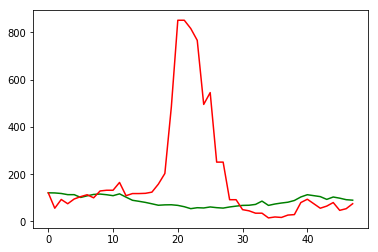

 91%|█████████ | 31/34 [07:20<00:42, 14.20s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:221.482	val-gamma-nloglik:289.844	train-sMAPE:1.97242	val-sMAPE:1.97619
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.6134	val-gamma-nloglik:6.5369	train-sMAPE:0.053915	val-sMAPE:0.491485
[200]	train-gamma-nloglik:5.6112	val-gamma-nloglik:6.51912	train-sMAPE:0.01794	val-sMAPE:0.483015
Stopping. Best iteration:
[224]	train-gamma-nloglik:5.61112	val-gamma-nloglik:6.51859	train-sMAPE:0.015088	val-sMAPE:0.482857



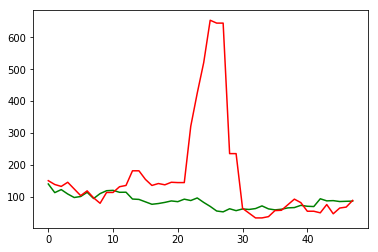

 94%|█████████▍| 32/34 [07:38<00:28, 14.34s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:222.947	val-gamma-nloglik:335.247	train-sMAPE:1.9723	val-sMAPE:1.97787
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.62247	val-gamma-nloglik:6.93978	train-sMAPE:0.070645	val-sMAPE:0.624921
[200]	train-gamma-nloglik:5.61836	val-gamma-nloglik:6.93867	train-sMAPE:0.022697	val-sMAPE:0.620649
Stopping. Best iteration:
[152]	train-gamma-nloglik:5.61902	val-gamma-nloglik:6.93382	train-sMAPE:0.035879	val-sMAPE:0.619434



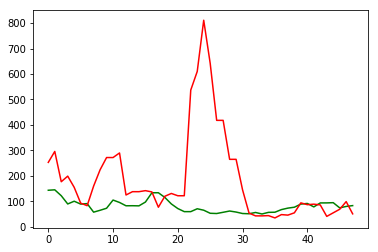

 97%|█████████▋| 33/34 [07:53<00:14, 14.35s/it]

(936, 12330)
(48, 12330)
[0]	train-gamma-nloglik:179.166	val-gamma-nloglik:225.17	train-sMAPE:1.96435	val-sMAPE:1.96067
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.37553	val-gamma-nloglik:5.89919	train-sMAPE:0.057176	val-sMAPE:0.583805
Stopping. Best iteration:
[108]	train-gamma-nloglik:5.37459	val-gamma-nloglik:5.8986	train-sMAPE:0.048138	val-sMAPE:0.581524



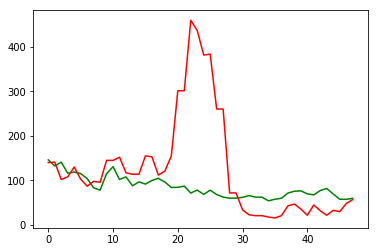

100%|██████████| 34/34 [08:05<00:00, 14.29s/it]


In [14]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+288*i:12093+288*(i+1)],train_data[:,-117:-102]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+288*i:12093+288*(i+1)],val_data[:,-117:-102]),axis = 1)
    trainY = train_data[:, -102+3*i+1]
    valY = val_data[:, -102+3*i+1]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)

    params={
#     'tree_method':'hist',
    'booster': 'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':1, # 随机采样训练样本
    'colsample_bytree':0.1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
    #     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/bj60/'+ str(i) +'_PM10.model') # 用于存储训练出的模型

# O3 小维度

  0%|          | 0/34 [00:00<?, ?it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:160.126	val-gamma-nloglik:130.006	train-sMAPE:1.87019	val-sMAPE:1.85615
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.26955	val-gamma-nloglik:5.10322	train-sMAPE:0.541474	val-sMAPE:0.518519
[200]	train-gamma-nloglik:5.21797	val-gamma-nloglik:5.0827	train-sMAPE:0.496445	val-sMAPE:0.517118
Stopping. Best iteration:
[165]	train-gamma-nloglik:5.23095	val-gamma-nloglik:5.08484	train-sMAPE:0.50814	val-sMAPE:0.506732



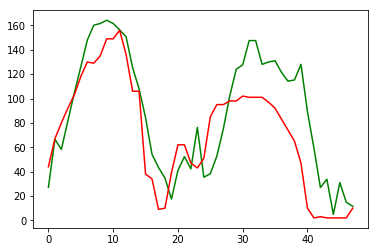

  3%|▎         | 1/34 [00:01<00:37,  1.14s/it]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:146.636	val-gamma-nloglik:99.5261	train-sMAPE:1.90163	val-sMAPE:1.90944
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.19683	val-gamma-nloglik:4.87374	train-sMAPE:0.522517	val-sMAPE:0.44272
Stopping. Best iteration:
[62]	train-gamma-nloglik:5.26856	val-gamma-nloglik:4.83367	train-sMAPE:0.574687	val-sMAPE:0.340585



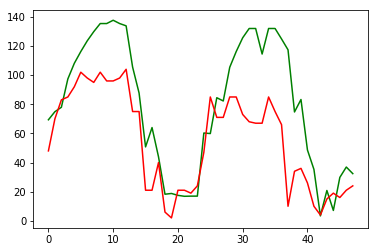

  6%|▌         | 2/34 [00:02<00:32,  1.01s/it]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:148.291	val-gamma-nloglik:121.631	train-sMAPE:1.86316	val-sMAPE:1.84765
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.1565	val-gamma-nloglik:5.0332	train-sMAPE:0.577838	val-sMAPE:0.524675
Stopping. Best iteration:
[94]	train-gamma-nloglik:5.16636	val-gamma-nloglik:5.02728	train-sMAPE:0.585156	val-sMAPE:0.513856



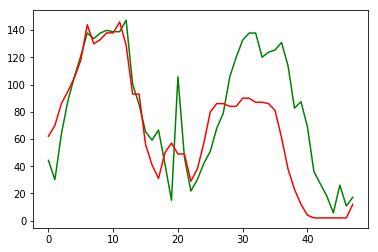

  9%|▉         | 3/34 [00:02<00:28,  1.07it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:153.846	val-gamma-nloglik:123.702	train-sMAPE:1.88329	val-sMAPE:1.82402
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.24447	val-gamma-nloglik:5.05091	train-sMAPE:0.555238	val-sMAPE:0.558027
Stopping. Best iteration:
[78]	train-gamma-nloglik:5.26851	val-gamma-nloglik:5.05715	train-sMAPE:0.580268	val-sMAPE:0.549873



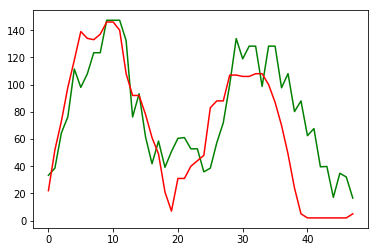

 12%|█▏        | 4/34 [00:03<00:26,  1.14it/s]

(936, 4)
(48, 4)
41.0
[0]	train-gamma-nloglik:168.956	val-gamma-nloglik:149.24	train-sMAPE:1.96834	val-sMAPE:1.97114
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.46923	val-gamma-nloglik:5.40473	train-sMAPE:0.311453	val-sMAPE:0.214818
Stopping. Best iteration:
[74]	train-gamma-nloglik:5.48041	val-gamma-nloglik:5.3961	train-sMAPE:0.325054	val-sMAPE:0.185814



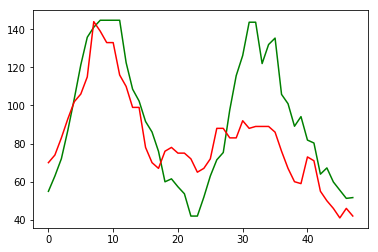

 15%|█▍        | 5/34 [00:04<00:24,  1.19it/s]

(936, 4)
(48, 4)
43.0
[0]	train-gamma-nloglik:196.651	val-gamma-nloglik:157.751	train-sMAPE:1.96893	val-sMAPE:1.97207
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.62871	val-gamma-nloglik:5.44913	train-sMAPE:0.34404	val-sMAPE:0.222695
Stopping. Best iteration:
[65]	train-gamma-nloglik:5.67793	val-gamma-nloglik:5.43813	train-sMAPE:0.398964	val-sMAPE:0.164416



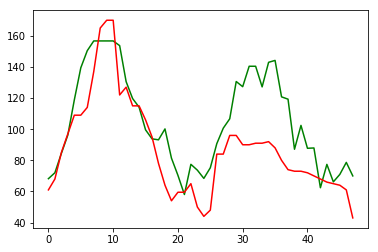

 18%|█▊        | 6/34 [00:04<00:22,  1.24it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:169.593	val-gamma-nloglik:127.433	train-sMAPE:1.92817	val-sMAPE:1.838
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.39471	val-gamma-nloglik:5.12176	train-sMAPE:0.421239	val-sMAPE:0.5227
Stopping. Best iteration:
[93]	train-gamma-nloglik:5.39695	val-gamma-nloglik:5.12344	train-sMAPE:0.424848	val-sMAPE:0.521994



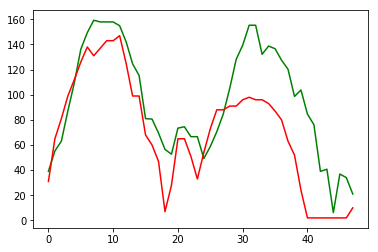

 21%|██        | 7/34 [00:05<00:21,  1.24it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:116.605	val-gamma-nloglik:104.628	train-sMAPE:1.78185	val-sMAPE:1.69167
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.79672	val-gamma-nloglik:4.58336	train-sMAPE:0.662011	val-sMAPE:0.696337
[200]	train-gamma-nloglik:4.72813	val-gamma-nloglik:4.56375	train-sMAPE:0.60279	val-sMAPE:0.655522
[300]	train-gamma-nloglik:4.68712	val-gamma-nloglik:4.55444	train-sMAPE:0.566104	val-sMAPE:0.619888
[400]	train-gamma-nloglik:4.65885	val-gamma-nloglik:4.56096	train-sMAPE:0.536917	val-sMAPE:0.608883
[500]	train-gamma-nloglik:4.6356	val-gamma-nloglik:4.54866	train-sMAPE:0.508343	val-sMAPE:0.59382
[599]	train-gamma-nloglik:4.61741	val-gamma-nloglik:4.55928	train-sMAPE:0.487075	val-sMAPE:0.594144
Stopping. Best iteration:
[549]	train-gamma-nloglik:4.62573	val-gamma-nloglik:4.54838	train-sMAPE:0.497577	val-sMAPE:0.586645



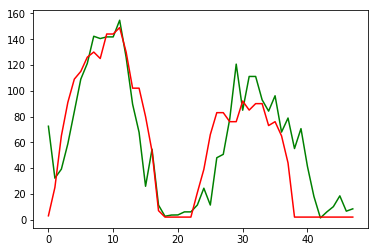

 24%|██▎       | 8/34 [00:08<00:27,  1.06s/it]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:174.169	val-gamma-nloglik:138.856	train-sMAPE:1.91609	val-sMAPE:1.87576
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.36313	val-gamma-nloglik:5.1444	train-sMAPE:0.450472	val-sMAPE:0.5602
[200]	train-gamma-nloglik:5.32452	val-gamma-nloglik:5.1447	train-sMAPE:0.408035	val-sMAPE:0.550709
[300]	train-gamma-nloglik:5.30392	val-gamma-nloglik:5.1451	train-sMAPE:0.382786	val-sMAPE:0.548253
Stopping. Best iteration:
[342]	train-gamma-nloglik:5.29694	val-gamma-nloglik:5.14865	train-sMAPE:0.372339	val-sMAPE:0.543956



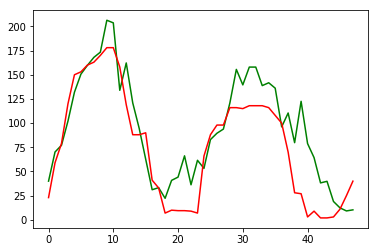

 26%|██▋       | 9/34 [00:10<00:29,  1.16s/it]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:159.734	val-gamma-nloglik:124.909	train-sMAPE:1.89388	val-sMAPE:1.85641
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.28217	val-gamma-nloglik:5.02011	train-sMAPE:0.48819	val-sMAPE:0.493235
Stopping. Best iteration:
[115]	train-gamma-nloglik:5.27381	val-gamma-nloglik:5.01004	train-sMAPE:0.479653	val-sMAPE:0.48446



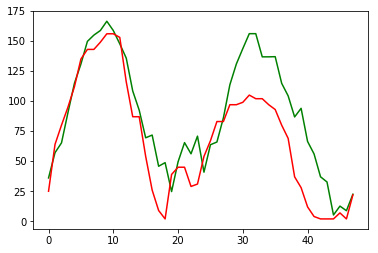

 29%|██▉       | 10/34 [00:11<00:27,  1.14s/it]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:172.592	val-gamma-nloglik:130.901	train-sMAPE:1.91831	val-sMAPE:1.90251
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.39243	val-gamma-nloglik:5.15742	train-sMAPE:0.455316	val-sMAPE:0.481519
Stopping. Best iteration:
[65]	train-gamma-nloglik:5.44972	val-gamma-nloglik:5.14286	train-sMAPE:0.516085	val-sMAPE:0.460577



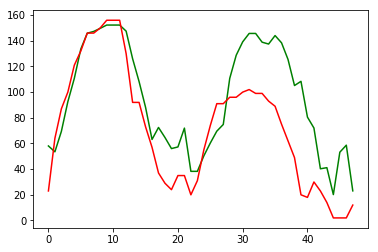

 32%|███▏      | 11/34 [00:12<00:25,  1.09s/it]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:153.916	val-gamma-nloglik:145.824	train-sMAPE:1.89352	val-sMAPE:1.94811
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.24448	val-gamma-nloglik:5.50698	train-sMAPE:0.499064	val-sMAPE:0.387874
Stopping. Best iteration:
[77]	train-gamma-nloglik:5.26766	val-gamma-nloglik:5.36793	train-sMAPE:0.521533	val-sMAPE:0.364686



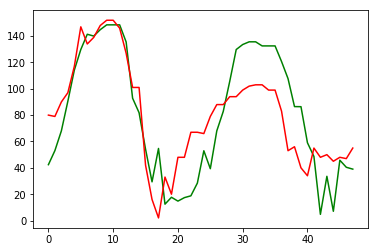

 35%|███▌      | 12/34 [00:12<00:23,  1.06s/it]

(936, 4)
(48, 4)
28.0
[0]	train-gamma-nloglik:181.903	val-gamma-nloglik:153.571	train-sMAPE:1.97051	val-sMAPE:1.97087
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.54009	val-gamma-nloglik:5.41674	train-sMAPE:0.296562	val-sMAPE:0.199602
Stopping. Best iteration:
[81]	train-gamma-nloglik:5.54571	val-gamma-nloglik:5.41304	train-sMAPE:0.305292	val-sMAPE:0.183832



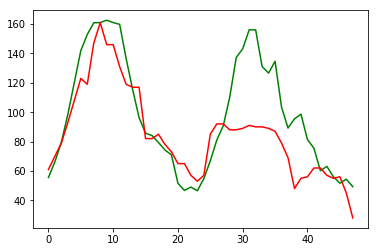

 38%|███▊      | 13/34 [00:13<00:21,  1.04s/it]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:160.528	val-gamma-nloglik:131.317	train-sMAPE:1.92555	val-sMAPE:1.86959
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.31162	val-gamma-nloglik:5.08699	train-sMAPE:0.44322	val-sMAPE:0.496936
Stopping. Best iteration:
[72]	train-gamma-nloglik:5.33117	val-gamma-nloglik:5.0713	train-sMAPE:0.46992	val-sMAPE:0.487045



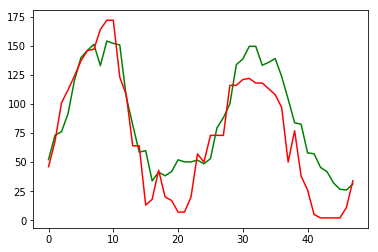

 41%|████      | 14/34 [00:14<00:20,  1.03s/it]

(936, 4)
(48, 4)
49.0
[0]	train-gamma-nloglik:179.07	val-gamma-nloglik:166.586	train-sMAPE:1.96356	val-sMAPE:1.97486
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.50445	val-gamma-nloglik:5.58645	train-sMAPE:0.342742	val-sMAPE:0.330896
Stopping. Best iteration:
[65]	train-gamma-nloglik:5.54906	val-gamma-nloglik:5.57929	train-sMAPE:0.394296	val-sMAPE:0.246892



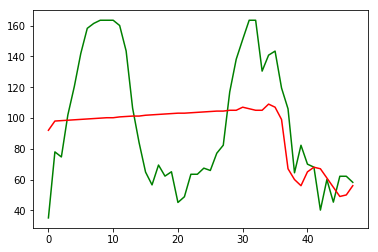

 44%|████▍     | 15/34 [00:15<00:19,  1.00s/it]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:192.159	val-gamma-nloglik:149.98	train-sMAPE:1.94992	val-sMAPE:1.90943
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.54282	val-gamma-nloglik:5.34639	train-sMAPE:0.414232	val-sMAPE:0.505844
Stopping. Best iteration:
[80]	train-gamma-nloglik:5.55648	val-gamma-nloglik:5.33804	train-sMAPE:0.427434	val-sMAPE:0.49977



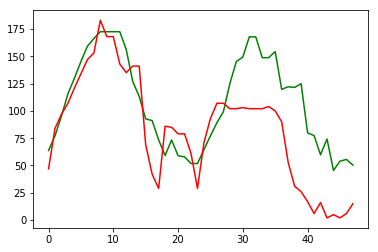

 47%|████▋     | 16/34 [00:15<00:17,  1.02it/s]

(936, 4)
(48, 4)
38.0
[0]	train-gamma-nloglik:226.016	val-gamma-nloglik:181.918	train-sMAPE:1.97837	val-sMAPE:1.97474
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.78054	val-gamma-nloglik:5.59016	train-sMAPE:0.272197	val-sMAPE:0.250808
Stopping. Best iteration:
[71]	train-gamma-nloglik:5.80109	val-gamma-nloglik:5.57784	train-sMAPE:0.291818	val-sMAPE:0.225876



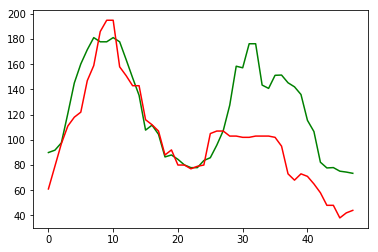

 50%|█████     | 17/34 [00:16<00:16,  1.03it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:101.97	val-gamma-nloglik:85.5893	train-sMAPE:1.8536	val-sMAPE:1.84592
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.80346	val-gamma-nloglik:4.6182	train-sMAPE:0.521668	val-sMAPE:0.468523
Stopping. Best iteration:
[119]	train-gamma-nloglik:4.79047	val-gamma-nloglik:4.61332	train-sMAPE:0.509509	val-sMAPE:0.458409



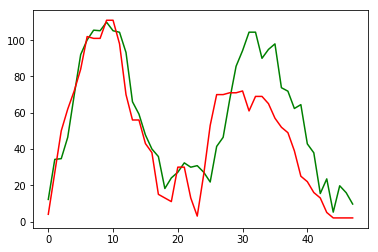

 53%|█████▎    | 18/34 [00:17<00:15,  1.04it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:147.918	val-gamma-nloglik:116.352	train-sMAPE:1.87716	val-sMAPE:1.82841
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.20943	val-gamma-nloglik:5.01404	train-sMAPE:0.517048	val-sMAPE:0.521009
Stopping. Best iteration:
[149]	train-gamma-nloglik:5.18477	val-gamma-nloglik:4.99924	train-sMAPE:0.495788	val-sMAPE:0.516486



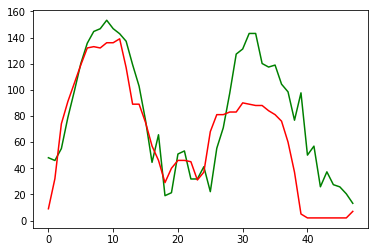

 56%|█████▌    | 19/34 [00:18<00:14,  1.03it/s]

(936, 4)
(48, 4)
18.0
[0]	train-gamma-nloglik:176.056	val-gamma-nloglik:144.334	train-sMAPE:1.95548	val-sMAPE:1.96368
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.47439	val-gamma-nloglik:5.3499	train-sMAPE:0.369758	val-sMAPE:0.319752
Stopping. Best iteration:
[78]	train-gamma-nloglik:5.48557	val-gamma-nloglik:5.33864	train-sMAPE:0.386461	val-sMAPE:0.301189



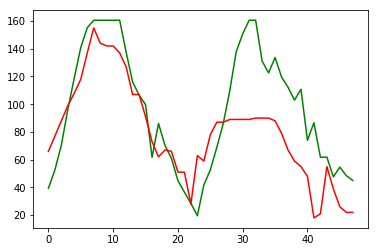

 59%|█████▉    | 20/34 [00:19<00:13,  1.04it/s]

(936, 4)
(48, 4)
13.0
[0]	train-gamma-nloglik:207.857	val-gamma-nloglik:169.174	train-sMAPE:1.96932	val-sMAPE:1.96788
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.66914	val-gamma-nloglik:5.47331	train-sMAPE:0.367736	val-sMAPE:0.291198
Stopping. Best iteration:
[68]	train-gamma-nloglik:5.70315	val-gamma-nloglik:5.46684	train-sMAPE:0.405154	val-sMAPE:0.279014



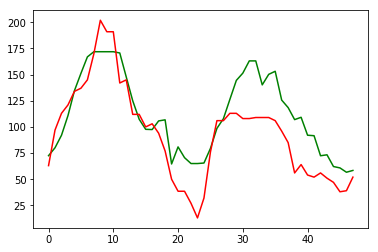

 62%|██████▏   | 21/34 [00:19<00:12,  1.06it/s]

(936, 4)
(48, 4)
19.0
[0]	train-gamma-nloglik:142.506	val-gamma-nloglik:137.243	train-sMAPE:1.90239	val-sMAPE:1.96235
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.16516	val-gamma-nloglik:5.27617	train-sMAPE:0.458562	val-sMAPE:0.267381
Stopping. Best iteration:
[70]	train-gamma-nloglik:5.19536	val-gamma-nloglik:5.26547	train-sMAPE:0.490609	val-sMAPE:0.248154



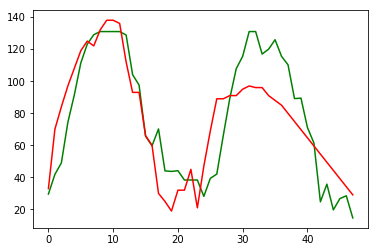

 65%|██████▍   | 22/34 [00:20<00:11,  1.07it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:179.092	val-gamma-nloglik:134.857	train-sMAPE:1.94034	val-sMAPE:1.85444
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.46014	val-gamma-nloglik:5.17826	train-sMAPE:0.402434	val-sMAPE:0.547967
Stopping. Best iteration:
[114]	train-gamma-nloglik:5.45503	val-gamma-nloglik:5.17241	train-sMAPE:0.39586	val-sMAPE:0.546056



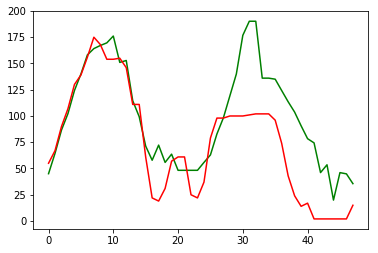

 68%|██████▊   | 23/34 [00:21<00:10,  1.08it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:140.857	val-gamma-nloglik:130.813	train-sMAPE:1.89416	val-sMAPE:1.88807
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.14808	val-gamma-nloglik:5.15742	train-sMAPE:0.488393	val-sMAPE:0.435101
[200]	train-gamma-nloglik:5.1069	val-gamma-nloglik:5.14234	train-sMAPE:0.442896	val-sMAPE:0.393568
Stopping. Best iteration:
[174]	train-gamma-nloglik:5.11544	val-gamma-nloglik:5.14339	train-sMAPE:0.45123	val-sMAPE:0.391149



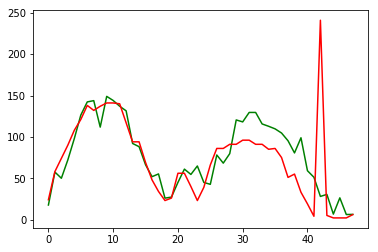

 71%|███████   | 24/34 [00:22<00:09,  1.07it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:158.592	val-gamma-nloglik:116.304	train-sMAPE:1.90676	val-sMAPE:1.82233
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.25619	val-gamma-nloglik:4.89687	train-sMAPE:0.476316	val-sMAPE:0.54122
Stopping. Best iteration:
[86]	train-gamma-nloglik:5.26614	val-gamma-nloglik:4.89902	train-sMAPE:0.486616	val-sMAPE:0.536579



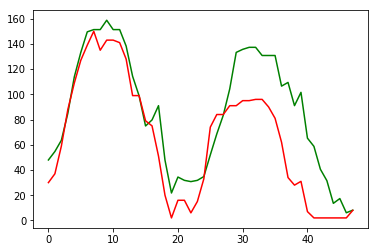

 74%|███████▎  | 25/34 [00:23<00:08,  1.08it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:155.501	val-gamma-nloglik:125.515	train-sMAPE:1.88736	val-sMAPE:1.84416
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.22848	val-gamma-nloglik:4.9848	train-sMAPE:0.509433	val-sMAPE:0.522038
[200]	train-gamma-nloglik:5.18221	val-gamma-nloglik:4.96534	train-sMAPE:0.465532	val-sMAPE:0.510326
Stopping. Best iteration:
[169]	train-gamma-nloglik:5.19241	val-gamma-nloglik:4.96694	train-sMAPE:0.474542	val-sMAPE:0.503429



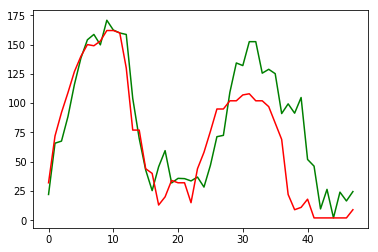

 76%|███████▋  | 26/34 [00:24<00:07,  1.06it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:150.702	val-gamma-nloglik:120.649	train-sMAPE:1.91229	val-sMAPE:1.8843
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.26185	val-gamma-nloglik:5.03803	train-sMAPE:0.43665	val-sMAPE:0.436961
Stopping. Best iteration:
[70]	train-gamma-nloglik:5.2859	val-gamma-nloglik:5.04026	train-sMAPE:0.466545	val-sMAPE:0.424716



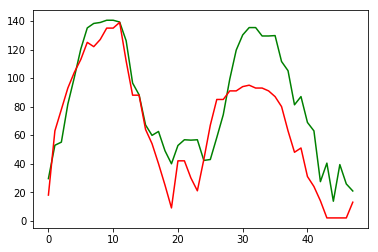

 79%|███████▉  | 27/34 [00:25<00:06,  1.07it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:126.715	val-gamma-nloglik:102.705	train-sMAPE:1.87417	val-sMAPE:1.89631
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.06077	val-gamma-nloglik:4.87447	train-sMAPE:0.516818	val-sMAPE:0.455459
Stopping. Best iteration:
[89]	train-gamma-nloglik:5.06999	val-gamma-nloglik:4.86901	train-sMAPE:0.525963	val-sMAPE:0.450661



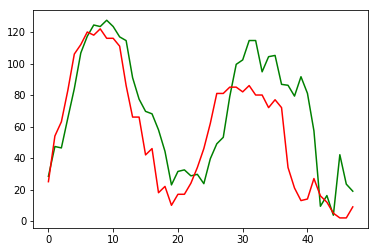

 82%|████████▏ | 28/34 [00:25<00:05,  1.08it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:175.661	val-gamma-nloglik:123.278	train-sMAPE:1.91959	val-sMAPE:1.8797
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.47172	val-gamma-nloglik:5.12826	train-sMAPE:0.471597	val-sMAPE:0.533566
Stopping. Best iteration:
[63]	train-gamma-nloglik:5.53243	val-gamma-nloglik:5.10766	train-sMAPE:0.533942	val-sMAPE:0.498817



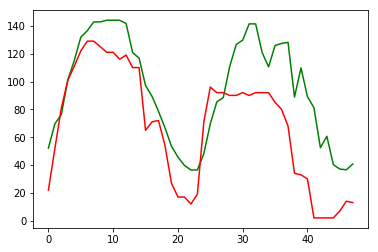

 85%|████████▌ | 29/34 [00:26<00:04,  1.09it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:161.941	val-gamma-nloglik:120.037	train-sMAPE:1.8976	val-sMAPE:1.80987
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.31522	val-gamma-nloglik:5.0134	train-sMAPE:0.48216	val-sMAPE:0.642285
Stopping. Best iteration:
[77]	train-gamma-nloglik:5.33209	val-gamma-nloglik:4.99259	train-sMAPE:0.500831	val-sMAPE:0.625983



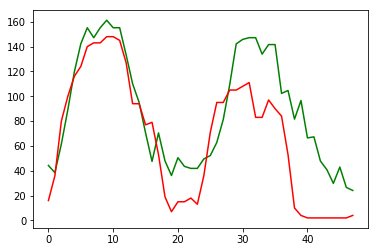

 88%|████████▊ | 30/34 [00:27<00:03,  1.10it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:141.875	val-gamma-nloglik:108.012	train-sMAPE:1.85818	val-sMAPE:1.78533
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.11048	val-gamma-nloglik:4.83488	train-sMAPE:0.558883	val-sMAPE:0.654234
Stopping. Best iteration:
[78]	train-gamma-nloglik:5.13036	val-gamma-nloglik:4.82148	train-sMAPE:0.578969	val-sMAPE:0.639698



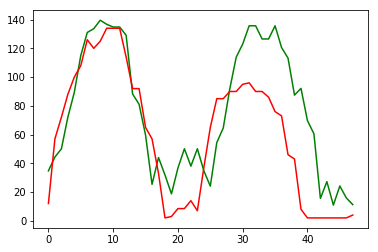

 91%|█████████ | 31/34 [00:27<00:02,  1.11it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:152.644	val-gamma-nloglik:124.014	train-sMAPE:1.8577	val-sMAPE:1.81786
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.14438	val-gamma-nloglik:5.05567	train-sMAPE:0.544641	val-sMAPE:0.578267
Stopping. Best iteration:
[79]	train-gamma-nloglik:5.16385	val-gamma-nloglik:5.04071	train-sMAPE:0.565625	val-sMAPE:0.563977



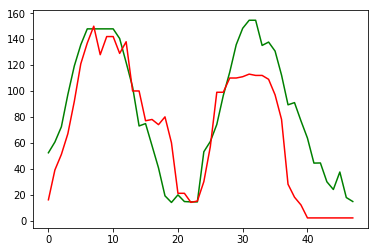

 94%|█████████▍| 32/34 [00:28<00:01,  1.12it/s]

(936, 4)
(48, 4)
2.0
[0]	train-gamma-nloglik:163.694	val-gamma-nloglik:151.308	train-sMAPE:1.9242	val-sMAPE:1.87466
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.36513	val-gamma-nloglik:5.24404	train-sMAPE:0.448043	val-sMAPE:0.525695
Stopping. Best iteration:
[143]	train-gamma-nloglik:5.34764	val-gamma-nloglik:5.23523	train-sMAPE:0.431286	val-sMAPE:0.506311



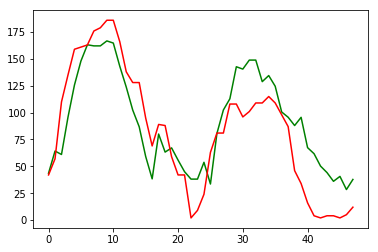

 97%|█████████▋| 33/34 [00:29<00:00,  1.12it/s]

(936, 4)
(48, 4)
16.0
[0]	train-gamma-nloglik:172.544	val-gamma-nloglik:131.941	train-sMAPE:1.95844	val-sMAPE:1.96049
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.4414	val-gamma-nloglik:5.22998	train-sMAPE:0.368508	val-sMAPE:0.294553
Stopping. Best iteration:
[66]	train-gamma-nloglik:5.48064	val-gamma-nloglik:5.21236	train-sMAPE:0.420983	val-sMAPE:0.246907



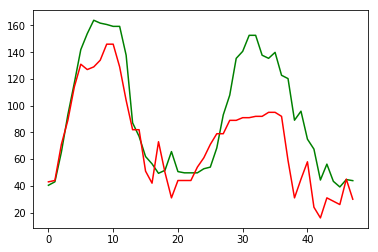

100%|██████████| 34/34 [00:30<00:00,  1.13it/s]


In [15]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,68+6*i+4:68+6*i+5],train_data[:,-115:-114],train_data[:,-110:-109],train_data[:,-104:-103]),axis = 1)
    valX = np.concatenate((val_data[:,68+6*i+4:68+6*i+5],val_data[:,-115:-114],val_data[:,-110:-109],val_data[:,-104:-103]),axis = 1)
    trainY = train_data[:, -102+3*i+2]
    valY = val_data[:, -102+3*i+2]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)
    print(min(valY))
    
    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':2, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':1, # 随机采样训练样本
    'colsample_bytree':1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/bj60/'+ str(i) +'_O3.model') # 用于存储训练出的模型

# O3大维度

  0%|          | 0/34 [00:00<?, ?it/s]

(828, 12330)
(48, 12330)
2.0
[0]	train-gamma-nloglik:161.144	val-gamma-nloglik:85.3915	train-sMAPE:1.88174	val-sMAPE:1.77358
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.01091	val-gamma-nloglik:4.7439	train-sMAPE:0.059503	val-sMAPE:0.806539
Stopping. Best iteration:
[57]	train-gamma-nloglik:5.17865	val-gamma-nloglik:4.70149	train-sMAPE:0.421148	val-sMAPE:0.77197



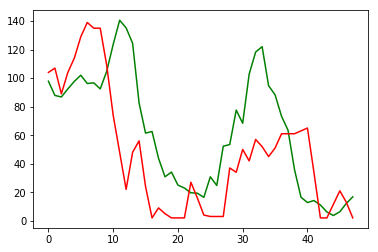

  3%|▎         | 1/34 [00:08<04:52,  8.87s/it]

(828, 12330)
(48, 12330)
7.0
[0]	train-gamma-nloglik:144.741	val-gamma-nloglik:108.523	train-sMAPE:1.89404	val-sMAPE:1.94241
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.90546	val-gamma-nloglik:5.62181	train-sMAPE:0.07431	val-sMAPE:0.565181
Stopping. Best iteration:
[72]	train-gamma-nloglik:4.92796	val-gamma-nloglik:5.52183	train-sMAPE:0.184657	val-sMAPE:0.536998



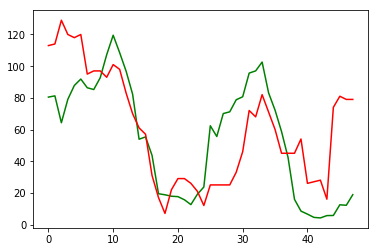

  6%|▌         | 2/34 [00:19<05:05,  9.56s/it]

(828, 12330)
(48, 12330)
8.0
[0]	train-gamma-nloglik:148.515	val-gamma-nloglik:86.1335	train-sMAPE:1.84527	val-sMAPE:1.92519
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.78728	val-gamma-nloglik:4.8359	train-sMAPE:0.066589	val-sMAPE:0.459509
Stopping. Best iteration:
[66]	train-gamma-nloglik:4.83667	val-gamma-nloglik:4.79833	train-sMAPE:0.247447	val-sMAPE:0.406492



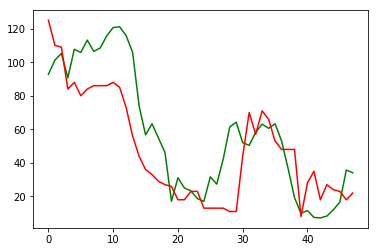

  9%|▉         | 3/34 [00:29<05:00,  9.70s/it]

(828, 12330)
(48, 12330)
2.0
[0]	train-gamma-nloglik:157.489	val-gamma-nloglik:39.0266	train-sMAPE:1.89496	val-sMAPE:1.84111
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[35]	train-gamma-nloglik:8.27423	val-gamma-nloglik:4.38953	train-sMAPE:1.18175	val-sMAPE:0.487022



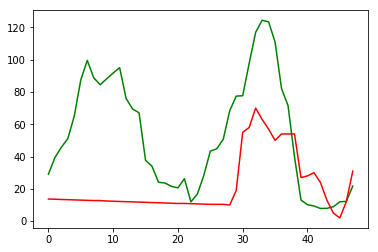

 12%|█▏        | 4/34 [00:36<04:37,  9.25s/it]

(828, 12330)
(48, 12330)
21.0
[0]	train-gamma-nloglik:169.726	val-gamma-nloglik:101.691	train-sMAPE:1.96902	val-sMAPE:1.9537
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.40895	val-gamma-nloglik:5.05009	train-sMAPE:0.042415	val-sMAPE:0.415305
Stopping. Best iteration:
[55]	train-gamma-nloglik:5.60355	val-gamma-nloglik:5.00994	train-sMAPE:0.462362	val-sMAPE:0.271147



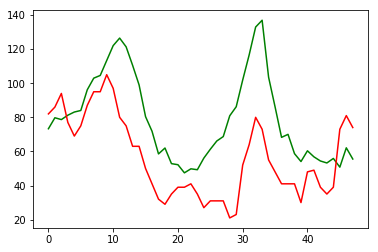

 15%|█▍        | 5/34 [00:45<04:26,  9.19s/it]

(828, 12330)
(48, 12330)
16.0
[0]	train-gamma-nloglik:196.831	val-gamma-nloglik:105.381	train-sMAPE:1.96904	val-sMAPE:1.95359
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.54089	val-gamma-nloglik:5.0614	train-sMAPE:0.039311	val-sMAPE:0.367283
Stopping. Best iteration:
[64]	train-gamma-nloglik:5.60088	val-gamma-nloglik:5.05304	train-sMAPE:0.265512	val-sMAPE:0.31964



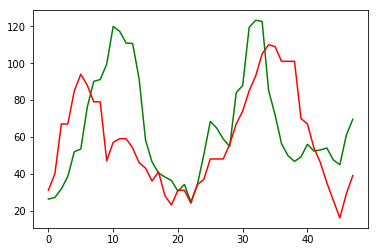

 18%|█▊        | 6/34 [00:55<04:19,  9.28s/it]

(828, 12330)
(48, 12330)
6.0
[0]	train-gamma-nloglik:170.347	val-gamma-nloglik:103.219	train-sMAPE:1.92844	val-sMAPE:1.93613
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.22115	val-gamma-nloglik:5.12928	train-sMAPE:0.056341	val-sMAPE:0.625723
Stopping. Best iteration:
[55]	train-gamma-nloglik:5.4503	val-gamma-nloglik:5.08482	train-sMAPE:0.495971	val-sMAPE:0.560014



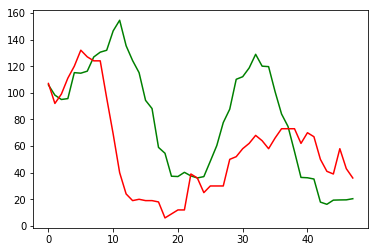

 21%|██        | 7/34 [01:04<04:09,  9.26s/it]

(828, 12330)
(48, 12330)
2.0
[0]	train-gamma-nloglik:111.929	val-gamma-nloglik:45.3689	train-sMAPE:1.78127	val-sMAPE:1.6548
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[48]	train-gamma-nloglik:4.77797	val-gamma-nloglik:4.09936	train-sMAPE:0.571137	val-sMAPE:0.848337



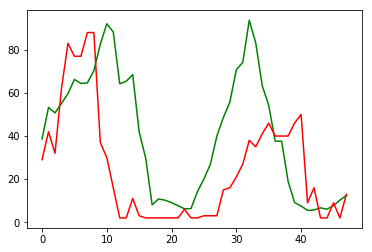

 24%|██▎       | 8/34 [01:13<03:59,  9.19s/it]

(828, 12330)
(48, 12330)
6.0
[0]	train-gamma-nloglik:173.333	val-gamma-nloglik:109.795	train-sMAPE:1.91795	val-sMAPE:1.93665
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.17093	val-gamma-nloglik:4.98358	train-sMAPE:0.057184	val-sMAPE:0.454372
Stopping. Best iteration:
[59]	train-gamma-nloglik:5.30544	val-gamma-nloglik:4.93941	train-sMAPE:0.382482	val-sMAPE:0.330692



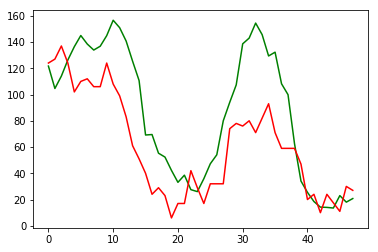

 26%|██▋       | 9/34 [01:23<03:50,  9.23s/it]

(828, 12330)
(48, 12330)
2.0
[0]	train-gamma-nloglik:159.905	val-gamma-nloglik:94.0101	train-sMAPE:1.89927	val-sMAPE:1.86774
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.05854	val-gamma-nloglik:4.75766	train-sMAPE:0.058267	val-sMAPE:0.605683
Stopping. Best iteration:
[58]	train-gamma-nloglik:5.20128	val-gamma-nloglik:4.73551	train-sMAPE:0.397109	val-sMAPE:0.568396



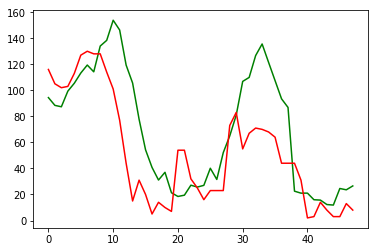

 29%|██▉       | 10/34 [01:32<03:41,  9.24s/it]

(828, 12330)
(48, 12330)
2.0
[0]	train-gamma-nloglik:175.244	val-gamma-nloglik:93.3314	train-sMAPE:1.92391	val-sMAPE:1.88022
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.22628	val-gamma-nloglik:4.9772	train-sMAPE:0.056557	val-sMAPE:0.709404
Stopping. Best iteration:
[58]	train-gamma-nloglik:5.37956	val-gamma-nloglik:4.9096	train-sMAPE:0.408867	val-sMAPE:0.664063



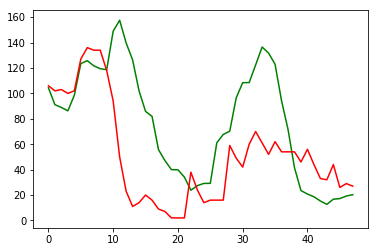

 32%|███▏      | 11/34 [01:42<03:34,  9.32s/it]

(828, 12330)
(48, 12330)
9.0
[0]	train-gamma-nloglik:154.113	val-gamma-nloglik:101.103	train-sMAPE:1.88634	val-sMAPE:1.92397
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.97772	val-gamma-nloglik:4.88143	train-sMAPE:0.071356	val-sMAPE:0.364037
Stopping. Best iteration:
[95]	train-gamma-nloglik:4.97875	val-gamma-nloglik:4.88021	train-sMAPE:0.078839	val-sMAPE:0.361589



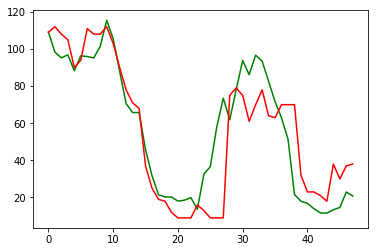

 35%|███▌      | 12/34 [01:54<03:29,  9.51s/it]

(828, 12330)
(48, 12330)
12.0
[0]	train-gamma-nloglik:180.735	val-gamma-nloglik:97.4273	train-sMAPE:1.97072	val-sMAPE:1.94335
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.46902	val-gamma-nloglik:4.98126	train-sMAPE:0.041448	val-sMAPE:0.53493
Stopping. Best iteration:
[51]	train-gamma-nloglik:5.8646	val-gamma-nloglik:4.98282	train-sMAPE:0.636502	val-sMAPE:0.387089



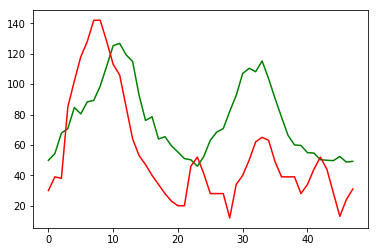

 38%|███▊      | 13/34 [02:04<03:20,  9.55s/it]

(828, 12330)
(48, 12330)
10.0
[0]	train-gamma-nloglik:155.996	val-gamma-nloglik:125.557	train-sMAPE:1.9231	val-sMAPE:1.95124
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.08563	val-gamma-nloglik:5.1341	train-sMAPE:0.063518	val-sMAPE:0.304952
Stopping. Best iteration:
[68]	train-gamma-nloglik:5.12125	val-gamma-nloglik:5.13048	train-sMAPE:0.215108	val-sMAPE:0.270062



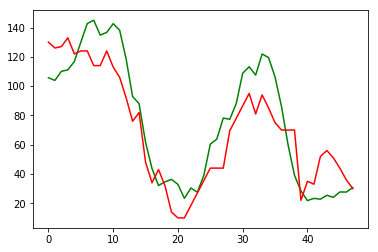

 41%|████      | 14/34 [02:14<03:11,  9.57s/it]

(828, 12330)
(48, 12330)
17.0
[0]	train-gamma-nloglik:175.587	val-gamma-nloglik:124.926	train-sMAPE:1.96421	val-sMAPE:1.95519
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.3892	val-gamma-nloglik:5.17187	train-sMAPE:0.059482	val-sMAPE:0.337127
Stopping. Best iteration:
[67]	train-gamma-nloglik:5.42708	val-gamma-nloglik:5.16499	train-sMAPE:0.221784	val-sMAPE:0.324335



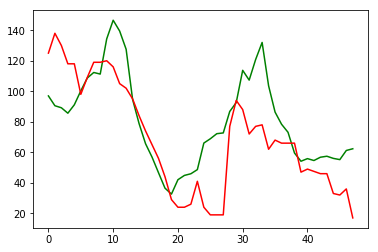

 44%|████▍     | 15/34 [02:24<03:02,  9.61s/it]

(828, 12330)
(48, 12330)
3.0
[0]	train-gamma-nloglik:190.822	val-gamma-nloglik:106.525	train-sMAPE:1.94592	val-sMAPE:1.93612
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.36745	val-gamma-nloglik:5.03721	train-sMAPE:0.061101	val-sMAPE:0.45643
Stopping. Best iteration:
[59]	train-gamma-nloglik:5.52526	val-gamma-nloglik:5.01008	train-sMAPE:0.425796	val-sMAPE:0.396853



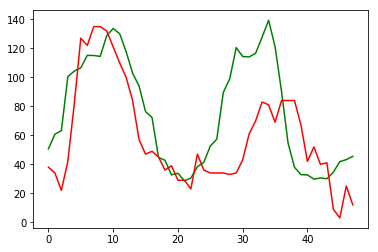

 47%|████▋     | 16/34 [02:33<02:53,  9.62s/it]

(828, 12330)
(48, 12330)
36.0
[0]	train-gamma-nloglik:224.498	val-gamma-nloglik:129.491	train-sMAPE:1.97846	val-sMAPE:1.96554
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.72581	val-gamma-nloglik:5.28923	train-sMAPE:0.035755	val-sMAPE:0.371031
Stopping. Best iteration:
[58]	train-gamma-nloglik:5.9036	val-gamma-nloglik:5.25041	train-sMAPE:0.45784	val-sMAPE:0.20984



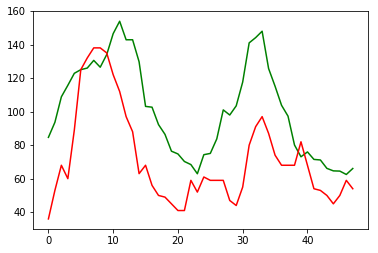

 50%|█████     | 17/34 [02:43<02:43,  9.61s/it]

(828, 12330)
(48, 12330)
2.0
[0]	train-gamma-nloglik:100.844	val-gamma-nloglik:44.8873	train-sMAPE:1.86304	val-sMAPE:1.76088
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[48]	train-gamma-nloglik:4.903	val-gamma-nloglik:4.05365	train-sMAPE:0.553123	val-sMAPE:0.675841



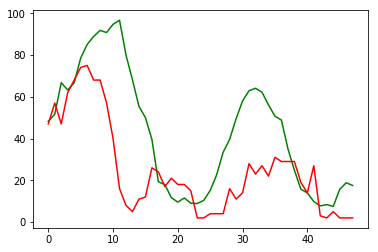

 53%|█████▎    | 18/34 [02:52<02:33,  9.57s/it]

(828, 12330)
(48, 12330)
2.0
[0]	train-gamma-nloglik:146.173	val-gamma-nloglik:79.7249	train-sMAPE:1.87643	val-sMAPE:1.83714
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.91898	val-gamma-nloglik:4.83891	train-sMAPE:0.060772	val-sMAPE:0.787956
Stopping. Best iteration:
[50]	train-gamma-nloglik:5.32123	val-gamma-nloglik:4.82419	train-sMAPE:0.617141	val-sMAPE:0.754819



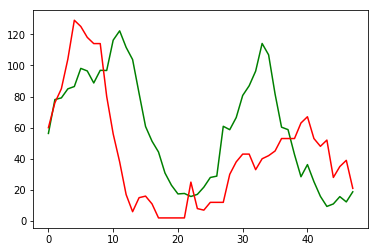

 56%|█████▌    | 19/34 [03:00<02:22,  9.51s/it]

(828, 12330)
(48, 12330)
16.0
[0]	train-gamma-nloglik:173.49	val-gamma-nloglik:103.482	train-sMAPE:1.95572	val-sMAPE:1.9502
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.34781	val-gamma-nloglik:5.05443	train-sMAPE:0.058216	val-sMAPE:0.459253
Stopping. Best iteration:
[55]	train-gamma-nloglik:5.57013	val-gamma-nloglik:5.03666	train-sMAPE:0.490887	val-sMAPE:0.371587



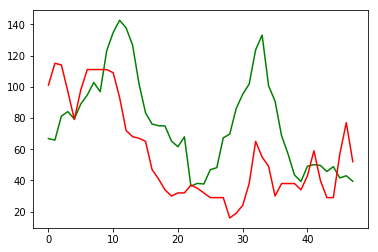

 59%|█████▉    | 20/34 [03:10<02:13,  9.55s/it]

(828, 12330)
(48, 12330)
28.0
[0]	train-gamma-nloglik:204.01	val-gamma-nloglik:121.021	train-sMAPE:1.96869	val-sMAPE:1.95974
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.54571	val-gamma-nloglik:5.19244	train-sMAPE:0.047642	val-sMAPE:0.391151
Stopping. Best iteration:
[60]	train-gamma-nloglik:5.67328	val-gamma-nloglik:5.18356	train-sMAPE:0.379837	val-sMAPE:0.314877



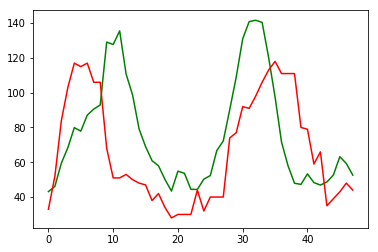

 62%|██████▏   | 21/34 [03:20<02:03,  9.53s/it]

(828, 12330)
(48, 12330)
3.0
[0]	train-gamma-nloglik:142.781	val-gamma-nloglik:71.5363	train-sMAPE:1.90446	val-sMAPE:1.89714
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[49]	train-gamma-nloglik:5.40807	val-gamma-nloglik:4.62905	train-sMAPE:0.624373	val-sMAPE:0.523651



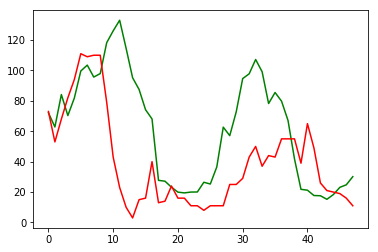

 65%|██████▍   | 22/34 [03:28<01:53,  9.48s/it]

(828, 12330)
(48, 12330)
12.0
[0]	train-gamma-nloglik:177.443	val-gamma-nloglik:109.548	train-sMAPE:1.94025	val-sMAPE:1.94697
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.29515	val-gamma-nloglik:5.1453	train-sMAPE:0.051269	val-sMAPE:0.498346
Stopping. Best iteration:
[65]	train-gamma-nloglik:5.35006	val-gamma-nloglik:5.09324	train-sMAPE:0.26489	val-sMAPE:0.432626



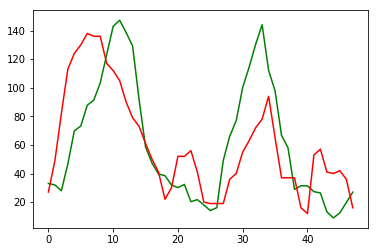

 68%|██████▊   | 23/34 [03:37<01:44,  9.48s/it]

(828, 12330)
(48, 12330)
6.0
[0]	train-gamma-nloglik:140.73	val-gamma-nloglik:81.9651	train-sMAPE:1.89727	val-sMAPE:1.90242
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[46]	train-gamma-nloglik:5.58498	val-gamma-nloglik:4.7923	train-sMAPE:0.723407	val-sMAPE:0.520072



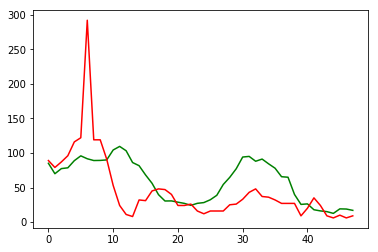

 71%|███████   | 24/34 [03:46<01:34,  9.42s/it]

(828, 12330)
(48, 12330)
2.0
[0]	train-gamma-nloglik:158.379	val-gamma-nloglik:86.8293	train-sMAPE:1.91352	val-sMAPE:1.8954
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.06905	val-gamma-nloglik:4.82949	train-sMAPE:0.054139	val-sMAPE:0.636629
Stopping. Best iteration:
[52]	train-gamma-nloglik:5.3936	val-gamma-nloglik:4.83154	train-sMAPE:0.548687	val-sMAPE:0.543586



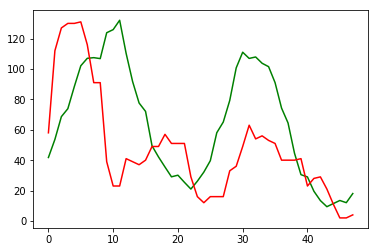

 74%|███████▎  | 25/34 [03:55<01:24,  9.40s/it]

(828, 12330)
(48, 12330)
5.0
[0]	train-gamma-nloglik:155.344	val-gamma-nloglik:90.6885	train-sMAPE:1.88891	val-sMAPE:1.91646
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.98048	val-gamma-nloglik:4.9043	train-sMAPE:0.062295	val-sMAPE:0.582528
Stopping. Best iteration:
[54]	train-gamma-nloglik:5.23034	val-gamma-nloglik:4.89222	train-sMAPE:0.499548	val-sMAPE:0.530721



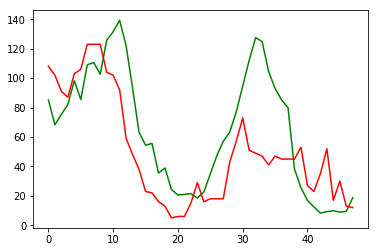

 76%|███████▋  | 26/34 [04:04<01:15,  9.41s/it]

(828, 12330)
(48, 12330)
5.0
[0]	train-gamma-nloglik:151.847	val-gamma-nloglik:81.8302	train-sMAPE:1.91634	val-sMAPE:1.90629
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.08524	val-gamma-nloglik:4.78013	train-sMAPE:0.055032	val-sMAPE:0.574859
Stopping. Best iteration:
[50]	train-gamma-nloglik:5.4849	val-gamma-nloglik:4.74734	train-sMAPE:0.615109	val-sMAPE:0.510536



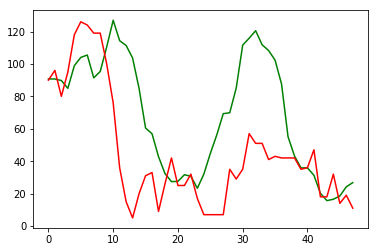

 79%|███████▉  | 27/34 [04:13<01:05,  9.38s/it]

(828, 12330)
(48, 12330)
3.0
[0]	train-gamma-nloglik:128.407	val-gamma-nloglik:70.9199	train-sMAPE:1.87581	val-sMAPE:1.88654
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[45]	train-gamma-nloglik:5.49472	val-gamma-nloglik:4.92386	train-sMAPE:0.735316	val-sMAPE:0.702414



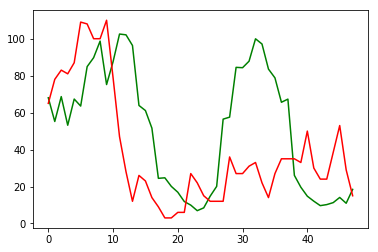

 82%|████████▏ | 28/34 [04:21<00:55,  9.33s/it]

(828, 12330)
(48, 12330)
11.0
[0]	train-gamma-nloglik:172.117	val-gamma-nloglik:132.976	train-sMAPE:1.91767	val-sMAPE:1.96125
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.20748	val-gamma-nloglik:5.39147	train-sMAPE:0.056042	val-sMAPE:0.422724
Stopping. Best iteration:
[78]	train-gamma-nloglik:5.21838	val-gamma-nloglik:5.37062	train-sMAPE:0.130055	val-sMAPE:0.412361



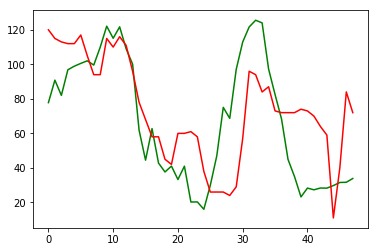

 85%|████████▌ | 29/34 [04:31<00:46,  9.35s/it]

(828, 12330)
(48, 12330)
2.0
[0]	train-gamma-nloglik:162.971	val-gamma-nloglik:80.5081	train-sMAPE:1.90839	val-sMAPE:1.85693
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.11213	val-gamma-nloglik:4.72228	train-sMAPE:0.054685	val-sMAPE:0.66752
Stopping. Best iteration:
[51]	train-gamma-nloglik:5.50218	val-gamma-nloglik:4.69338	train-sMAPE:0.610261	val-sMAPE:0.577025



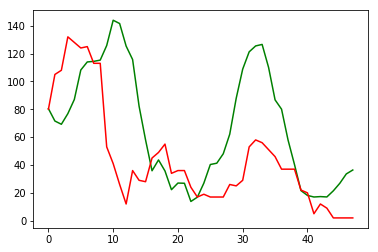

 88%|████████▊ | 30/34 [04:39<00:37,  9.31s/it]

(828, 12330)
(48, 12330)
2.0
[0]	train-gamma-nloglik:144.972	val-gamma-nloglik:61.31	train-sMAPE:1.86769	val-sMAPE:1.82341
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
Stopping. Best iteration:
[46]	train-gamma-nloglik:5.56363	val-gamma-nloglik:4.50213	train-sMAPE:0.739734	val-sMAPE:0.670168



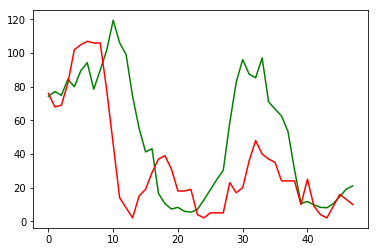

 91%|█████████ | 31/34 [04:47<00:27,  9.28s/it]

(828, 12330)
(48, 12330)
13.0
[0]	train-gamma-nloglik:159.414	val-gamma-nloglik:93.776	train-sMAPE:1.85851	val-sMAPE:1.94096
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.88939	val-gamma-nloglik:6.29055	train-sMAPE:0.070989	val-sMAPE:0.732707
Stopping. Best iteration:
[59]	train-gamma-nloglik:5.02458	val-gamma-nloglik:6.16188	train-sMAPE:0.389483	val-sMAPE:0.687379



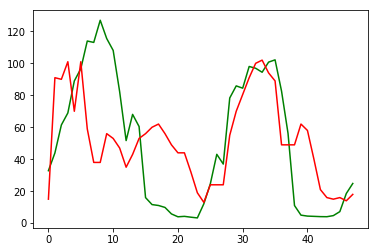

 94%|█████████▍| 32/34 [04:56<00:18,  9.28s/it]

(828, 12330)
(48, 12330)
2.0
[0]	train-gamma-nloglik:164.571	val-gamma-nloglik:83.9362	train-sMAPE:1.9319	val-sMAPE:1.85096
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.19985	val-gamma-nloglik:4.75058	train-sMAPE:0.055214	val-sMAPE:0.635758
Stopping. Best iteration:
[59]	train-gamma-nloglik:5.3192	val-gamma-nloglik:4.68304	train-sMAPE:0.373377	val-sMAPE:0.535762



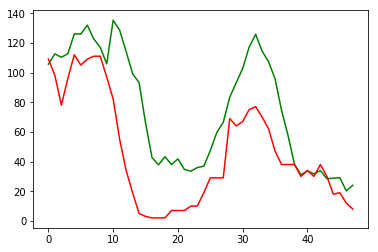

 97%|█████████▋| 33/34 [05:06<00:09,  9.28s/it]

(828, 12330)
(48, 12330)
8.0
[0]	train-gamma-nloglik:176.725	val-gamma-nloglik:85.8106	train-sMAPE:1.9571	val-sMAPE:1.92083
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.34547	val-gamma-nloglik:4.82482	train-sMAPE:0.054526	val-sMAPE:0.608549
Stopping. Best iteration:
[52]	train-gamma-nloglik:5.70097	val-gamma-nloglik:4.73484	train-sMAPE:0.584268	val-sMAPE:0.452079



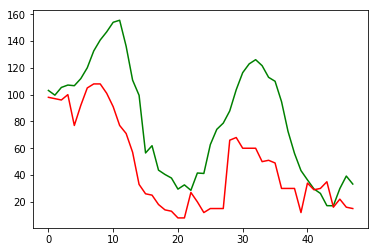

100%|██████████| 34/34 [05:14<00:00,  9.26s/it]


In [109]:
# for i in tqdm(range(34)):
#     trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+288*i:12093+288*(i+1)],train_data[:,-117:-102]),axis = 1)
#     valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+288*i:12093+288*(i+1)],val_data[:,-117:-102]),axis = 1)
#     trainY = train_data[:, -102+3*i+2]
#     valY = val_data[:, -102+3*i+2]
# #     trainY = beijing_train[:, -105+3*i]
# #     valY = beijing_test[:, -105+3*i]
#     print(trainX.shape)
#     print(valX.shape)
#     print(min(valY))
    
#     params={
# #     'tree_method':'hist',
#     'booster': 'gbtree',
#     'objective': 'reg:gamma', #多分类的问题
#     # 'num_class':2, # 类别数，与 multisoftmax 并用
#     'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
#     'max_depth':5, # 构建树的深度，越大越容易过拟合
#     'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
#     'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
#     'subsample':1, # 随机采样训练样本
#     'colsample_bytree':0.1, # 生成树时进行的列采样
#     'min_child_weight':1, 
#     # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#     #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#     #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
#     'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
#     'eta': 0.1, # 如同学习率
#     'seed':1000,
#     'nthread':-1,# cpu 线程数
#     #     'eval_metric':['mae','rmse']
#     }

#     plst = list(params.items())
#     num_rounds = 600 # 迭代次数
#     xgb_train = xgb.DMatrix(trainX, label= trainY)
#     xgb_val = xgb.DMatrix(valX, label= valY)
#     watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
#     #训练模型并保存
#     # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
#     model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
#     plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
#     plt.plot(valY,'r')
#     plt.show()
#     model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing/'+ str(i) +'_O3.model') # 用于存储训练出的模型

# London

In [16]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
# train_data, val_data = train_test_split(London_train, test_size = 0.3, random_state = 1)
train_data, val_data = London_train[:-48,:], London_train[-48:,:]###随机数原始为1

# PM2.5

  0%|          | 0/13 [00:00<?, ?it/s]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:29.355	val-gamma-nloglik:55.8869	train-sMAPE:1.83561	val-sMAPE:1.91898
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.65227	val-gamma-nloglik:4.39712	train-sMAPE:0.199558	val-sMAPE:0.28624
Stopping. Best iteration:
[106]	train-gamma-nloglik:3.64282	val-gamma-nloglik:4.38983	train-sMAPE:0.167016	val-sMAPE:0.279828



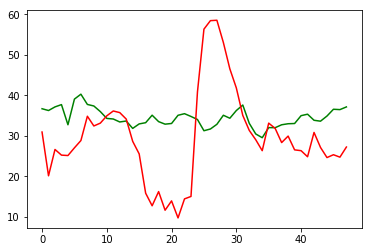

  8%|▊         | 1/13 [00:11<02:13, 11.14s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:21.8313	val-gamma-nloglik:46.3576	train-sMAPE:1.64301	val-sMAPE:1.88587
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.06641	val-gamma-nloglik:4.90924	train-sMAPE:0.259613	val-sMAPE:0.737211
[200]	train-gamma-nloglik:3.01022	val-gamma-nloglik:4.61509	train-sMAPE:0.105028	val-sMAPE:0.571178
[300]	train-gamma-nloglik:3.00265	val-gamma-nloglik:4.61196	train-sMAPE:0.050259	val-sMAPE:0.57002
Stopping. Best iteration:
[255]	train-gamma-nloglik:3.00458	val-gamma-nloglik:4.60575	train-sMAPE:0.069324	val-sMAPE:0.565903



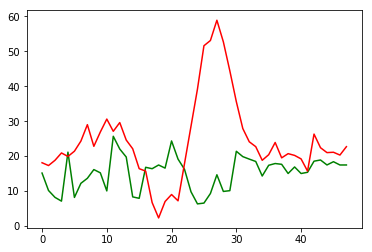

 15%|█▌        | 2/13 [00:31<02:55, 15.97s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:25.1688	val-gamma-nloglik:48.8417	train-sMAPE:1.75176	val-sMAPE:1.91079
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.36368	val-gamma-nloglik:4.35148	train-sMAPE:0.229387	val-sMAPE:0.394825
[200]	train-gamma-nloglik:3.32314	val-gamma-nloglik:4.26603	train-sMAPE:0.079803	val-sMAPE:0.253046
Stopping. Best iteration:
[219]	train-gamma-nloglik:3.32189	val-gamma-nloglik:4.26427	train-sMAPE:0.069828	val-sMAPE:0.248542



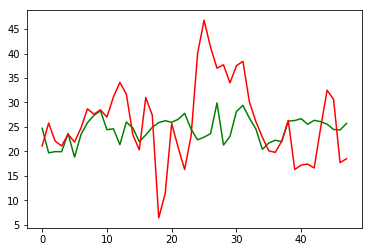

 23%|██▎       | 3/13 [00:50<02:47, 16.77s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:29.2819	val-gamma-nloglik:55.4399	train-sMAPE:1.82695	val-sMAPE:1.92184
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.63374	val-gamma-nloglik:4.38878	train-sMAPE:0.235409	val-sMAPE:0.246907
Stopping. Best iteration:
[112]	train-gamma-nloglik:3.61303	val-gamma-nloglik:4.37969	train-sMAPE:0.178969	val-sMAPE:0.238407



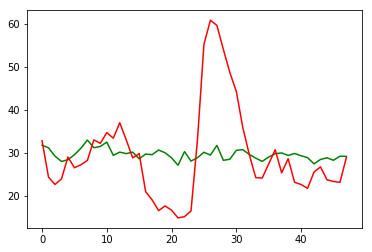

 31%|███       | 4/13 [01:01<02:18, 15.44s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:26.7678	val-gamma-nloglik:54.7622	train-sMAPE:1.75764	val-sMAPE:1.92175
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.40342	val-gamma-nloglik:5.06052	train-sMAPE:0.289084	val-sMAPE:0.649636
Stopping. Best iteration:
[148]	train-gamma-nloglik:3.34919	val-gamma-nloglik:4.82074	train-sMAPE:0.16598	val-sMAPE:0.474651



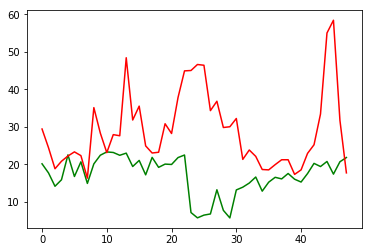

 38%|███▊      | 5/13 [01:15<02:00, 15.10s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:29.829	val-gamma-nloglik:63.8963	train-sMAPE:1.79718	val-sMAPE:1.93457
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.55508	val-gamma-nloglik:4.70831	train-sMAPE:0.226652	val-sMAPE:0.467957
[200]	train-gamma-nloglik:3.51078	val-gamma-nloglik:4.56999	train-sMAPE:0.05622	val-sMAPE:0.253818
[300]	train-gamma-nloglik:3.50879	val-gamma-nloglik:4.56557	train-sMAPE:0.028023	val-sMAPE:0.24493
[400]	train-gamma-nloglik:3.50834	val-gamma-nloglik:4.5655	train-sMAPE:0.014689	val-sMAPE:0.245249
Stopping. Best iteration:
[362]	train-gamma-nloglik:3.50845	val-gamma-nloglik:4.56487	train-sMAPE:0.018776	val-sMAPE:0.244108



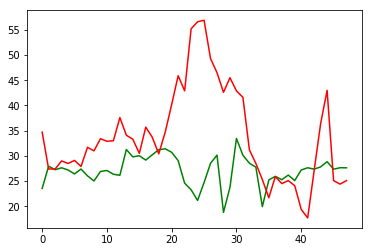

 46%|████▌     | 6/13 [01:43<02:00, 17.23s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:27.687	val-gamma-nloglik:56.7994	train-sMAPE:1.73917	val-sMAPE:1.92159
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.38951	val-gamma-nloglik:4.60978	train-sMAPE:0.249243	val-sMAPE:0.511603
[200]	train-gamma-nloglik:3.33921	val-gamma-nloglik:4.48912	train-sMAPE:0.078255	val-sMAPE:0.352498
Stopping. Best iteration:
[215]	train-gamma-nloglik:3.33832	val-gamma-nloglik:4.48818	train-sMAPE:0.071145	val-sMAPE:0.351035



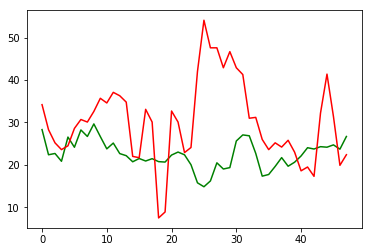

 54%|█████▍    | 7/13 [02:01<01:44, 17.40s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:35.4172	val-gamma-nloglik:76.7165	train-sMAPE:1.84217	val-sMAPE:1.94883
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.8052	val-gamma-nloglik:5.05062	train-sMAPE:0.259608	val-sMAPE:0.683027
[200]	train-gamma-nloglik:3.75033	val-gamma-nloglik:4.87301	train-sMAPE:0.074031	val-sMAPE:0.439314
[300]	train-gamma-nloglik:3.74695	val-gamma-nloglik:4.86647	train-sMAPE:0.036192	val-sMAPE:0.421282
[400]	train-gamma-nloglik:3.74621	val-gamma-nloglik:4.86532	train-sMAPE:0.019061	val-sMAPE:0.418289
[500]	train-gamma-nloglik:3.74603	val-gamma-nloglik:4.86477	train-sMAPE:0.011021	val-sMAPE:0.416287
Stopping. Best iteration:
[535]	train-gamma-nloglik:3.746	val-gamma-nloglik:4.86437	train-sMAPE:0.009218	val-sMAPE:0.415637



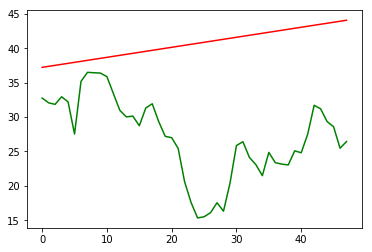

 62%|██████▏   | 8/13 [02:41<01:40, 20.17s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:40.614	val-gamma-nloglik:47.711	train-sMAPE:1.84461	val-sMAPE:1.91885
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.87899	val-gamma-nloglik:4.34764	train-sMAPE:0.2573	val-sMAPE:0.432461
[200]	train-gamma-nloglik:3.82625	val-gamma-nloglik:4.26235	train-sMAPE:0.048432	val-sMAPE:0.221946
[300]	train-gamma-nloglik:3.82432	val-gamma-nloglik:4.26131	train-sMAPE:0.027287	val-sMAPE:0.216487
Stopping. Best iteration:
[265]	train-gamma-nloglik:3.82466	val-gamma-nloglik:4.26088	train-sMAPE:0.032478	val-sMAPE:0.215216



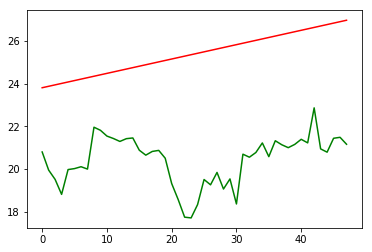

 69%|██████▉   | 9/13 [03:02<01:21, 20.29s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:21.6209	val-gamma-nloglik:55.5608	train-sMAPE:1.74196	val-sMAPE:1.89085
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.25036	val-gamma-nloglik:4.62702	train-sMAPE:0.178711	val-sMAPE:0.669743
[200]	train-gamma-nloglik:3.22088	val-gamma-nloglik:4.50407	train-sMAPE:0.035642	val-sMAPE:0.596786
Stopping. Best iteration:
[225]	train-gamma-nloglik:3.22044	val-gamma-nloglik:4.50143	train-sMAPE:0.027979	val-sMAPE:0.594855



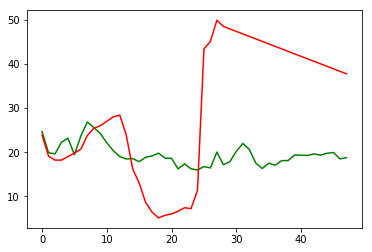

 77%|███████▋  | 10/13 [03:21<01:00, 20.16s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:36.0333	val-gamma-nloglik:60.6789	train-sMAPE:1.76781	val-sMAPE:1.93461
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.40547	val-gamma-nloglik:5.55859	train-sMAPE:0.245136	val-sMAPE:1.03423
[200]	train-gamma-nloglik:3.35277	val-gamma-nloglik:5.25814	train-sMAPE:0.040969	val-sMAPE:0.922326
[300]	train-gamma-nloglik:3.35126	val-gamma-nloglik:5.24688	train-sMAPE:0.021908	val-sMAPE:0.916787
Stopping. Best iteration:
[270]	train-gamma-nloglik:3.35151	val-gamma-nloglik:5.24203	train-sMAPE:0.026429	val-sMAPE:0.914785



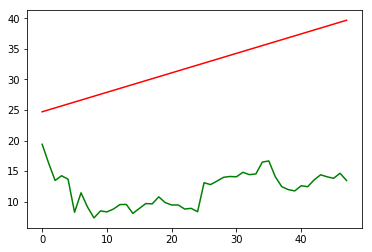

 85%|████████▍ | 11/13 [03:43<00:40, 20.31s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:27.3864	val-gamma-nloglik:76.6584	train-sMAPE:1.79174	val-sMAPE:1.94881
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.50529	val-gamma-nloglik:5.0658	train-sMAPE:0.232945	val-sMAPE:0.700394
[200]	train-gamma-nloglik:3.45939	val-gamma-nloglik:4.85622	train-sMAPE:0.076509	val-sMAPE:0.460204
[300]	train-gamma-nloglik:3.45588	val-gamma-nloglik:4.85537	train-sMAPE:0.039915	val-sMAPE:0.456883
[400]	train-gamma-nloglik:3.45502	val-gamma-nloglik:4.85154	train-sMAPE:0.023064	val-sMAPE:0.450535
Stopping. Best iteration:
[410]	train-gamma-nloglik:3.45497	val-gamma-nloglik:4.85132	train-sMAPE:0.021917	val-sMAPE:0.450326



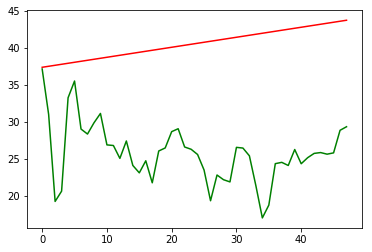

 92%|█████████▏| 12/13 [04:13<00:21, 21.14s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:33.4575	val-gamma-nloglik:60.1965	train-sMAPE:1.83617	val-sMAPE:1.92676
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.73143	val-gamma-nloglik:4.54584	train-sMAPE:0.228849	val-sMAPE:0.391018
Stopping. Best iteration:
[129]	train-gamma-nloglik:3.6938	val-gamma-nloglik:4.48425	train-sMAPE:0.126154	val-sMAPE:0.317771



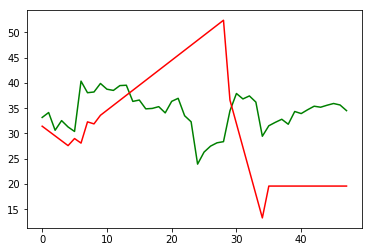

100%|██████████| 13/13 [04:26<00:00, 20.47s/it]


In [17]:
for i in tqdm(range(13)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,26:2185],train_data[:,2185+144*i:2185+144*(i+1)],train_data[:,-34:-26]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,26:2185],val_data[:,2185+144*i:2185+144*(i+1)],val_data[:,-34:-26]),axis = 1)
    trainY = train_data[:, -26+2*i]
    valY = val_data[:, -26+2*i]
    trainY[trainY <= 0] = 0.1
    valY[valY <= 0] = 0.1
#     trainY = London_train[:, -26+2*i]
#     valY = London_test[:, -26+2*i]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval = 100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/ld60/'+ str(i) +'_PM2.5.model') # 用于存储训练出的模型

# PM10

  0%|          | 0/13 [00:00<?, ?it/s]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:45.4399	val-gamma-nloglik:67.7766	train-sMAPE:1.88788	val-sMAPE:1.93172
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.21214	val-gamma-nloglik:4.90585	train-sMAPE:0.400407	val-sMAPE:0.645368
[200]	train-gamma-nloglik:4.09563	val-gamma-nloglik:4.68632	train-sMAPE:0.231123	val-sMAPE:0.442588
[300]	train-gamma-nloglik:4.08041	val-gamma-nloglik:4.68532	train-sMAPE:0.189911	val-sMAPE:0.417526
Stopping. Best iteration:
[340]	train-gamma-nloglik:4.07698	val-gamma-nloglik:4.68475	train-sMAPE:0.179472	val-sMAPE:0.410622



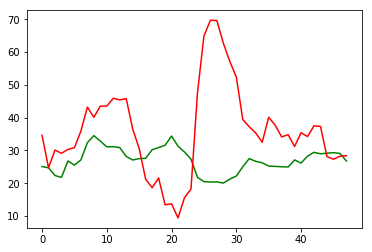

  8%|▊         | 1/13 [00:05<01:10,  5.84s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:39.7803	val-gamma-nloglik:64.9262	train-sMAPE:1.85963	val-sMAPE:1.92891
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.05769	val-gamma-nloglik:4.98507	train-sMAPE:0.416816	val-sMAPE:0.727321
[200]	train-gamma-nloglik:3.93721	val-gamma-nloglik:4.71582	train-sMAPE:0.261864	val-sMAPE:0.513911
[300]	train-gamma-nloglik:3.91736	val-gamma-nloglik:4.68407	train-sMAPE:0.21907	val-sMAPE:0.465981
[400]	train-gamma-nloglik:3.90752	val-gamma-nloglik:4.69074	train-sMAPE:0.193837	val-sMAPE:0.462269
Stopping. Best iteration:
[352]	train-gamma-nloglik:3.91156	val-gamma-nloglik:4.68047	train-sMAPE:0.204554	val-sMAPE:0.455969



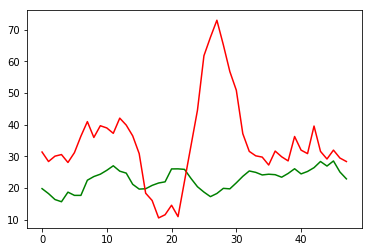

 15%|█▌        | 2/13 [00:11<01:05,  5.94s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:36.6784	val-gamma-nloglik:56.8559	train-sMAPE:1.83795	val-sMAPE:1.92009
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.96002	val-gamma-nloglik:4.79646	train-sMAPE:0.438982	val-sMAPE:0.677918
[200]	train-gamma-nloglik:3.83951	val-gamma-nloglik:4.55141	train-sMAPE:0.300351	val-sMAPE:0.46811
[300]	train-gamma-nloglik:3.81751	val-gamma-nloglik:4.52008	train-sMAPE:0.255413	val-sMAPE:0.430543
[400]	train-gamma-nloglik:3.80648	val-gamma-nloglik:4.51652	train-sMAPE:0.230793	val-sMAPE:0.424364
Stopping. Best iteration:
[352]	train-gamma-nloglik:3.81119	val-gamma-nloglik:4.51336	train-sMAPE:0.24202	val-sMAPE:0.420422



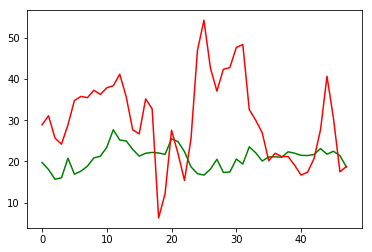

 23%|██▎       | 3/13 [00:18<01:00,  6.04s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:51.7323	val-gamma-nloglik:76.1626	train-sMAPE:1.90307	val-sMAPE:1.94411
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.36282	val-gamma-nloglik:5.06374	train-sMAPE:0.417125	val-sMAPE:0.65953
[200]	train-gamma-nloglik:4.24644	val-gamma-nloglik:4.88237	train-sMAPE:0.24748	val-sMAPE:0.448258
Stopping. Best iteration:
[168]	train-gamma-nloglik:4.25641	val-gamma-nloglik:4.86439	train-sMAPE:0.272824	val-sMAPE:0.441712



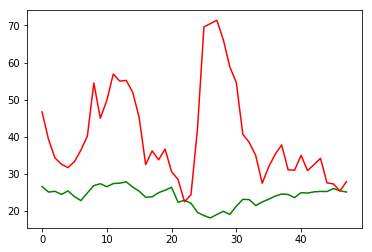

 31%|███       | 4/13 [00:21<00:48,  5.39s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:39.5995	val-gamma-nloglik:66.1249	train-sMAPE:1.8611	val-sMAPE:1.93578
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.05927	val-gamma-nloglik:4.97448	train-sMAPE:0.415458	val-sMAPE:0.704736
[200]	train-gamma-nloglik:3.95074	val-gamma-nloglik:4.69539	train-sMAPE:0.289099	val-sMAPE:0.438208
[300]	train-gamma-nloglik:3.93007	val-gamma-nloglik:4.65239	train-sMAPE:0.242578	val-sMAPE:0.375907
[400]	train-gamma-nloglik:3.91925	val-gamma-nloglik:4.64995	train-sMAPE:0.216672	val-sMAPE:0.368871
Stopping. Best iteration:
[375]	train-gamma-nloglik:3.9214	val-gamma-nloglik:4.64744	train-sMAPE:0.221823	val-sMAPE:0.365274



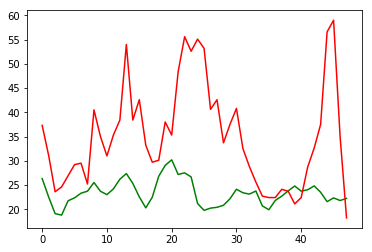

 38%|███▊      | 5/13 [00:27<00:44,  5.58s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:44.2611	val-gamma-nloglik:81.6393	train-sMAPE:1.88057	val-sMAPE:1.94873
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.17472	val-gamma-nloglik:5.42798	train-sMAPE:0.409277	val-sMAPE:0.866208
[200]	train-gamma-nloglik:4.04985	val-gamma-nloglik:5.00633	train-sMAPE:0.246704	val-sMAPE:0.572989
[300]	train-gamma-nloglik:4.03107	val-gamma-nloglik:4.95417	train-sMAPE:0.19696	val-sMAPE:0.497694
[400]	train-gamma-nloglik:4.0223	val-gamma-nloglik:4.92434	train-sMAPE:0.169689	val-sMAPE:0.454192
[500]	train-gamma-nloglik:4.01724	val-gamma-nloglik:4.92169	train-sMAPE:0.152427	val-sMAPE:0.447751
Stopping. Best iteration:
[495]	train-gamma-nloglik:4.01747	val-gamma-nloglik:4.91967	train-sMAPE:0.153323	val-sMAPE:0.444934



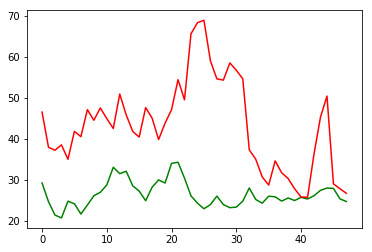

 46%|████▌     | 6/13 [00:35<00:41,  5.98s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:44.8127	val-gamma-nloglik:76.9915	train-sMAPE:1.87734	val-sMAPE:1.94326
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.17851	val-gamma-nloglik:5.23128	train-sMAPE:0.421406	val-sMAPE:0.787995
[200]	train-gamma-nloglik:4.04929	val-gamma-nloglik:4.86715	train-sMAPE:0.259258	val-sMAPE:0.504506
[300]	train-gamma-nloglik:4.03032	val-gamma-nloglik:4.82531	train-sMAPE:0.209899	val-sMAPE:0.44514
[400]	train-gamma-nloglik:4.02143	val-gamma-nloglik:4.82311	train-sMAPE:0.183019	val-sMAPE:0.432494
Stopping. Best iteration:
[434]	train-gamma-nloglik:4.01934	val-gamma-nloglik:4.81822	train-sMAPE:0.176252	val-sMAPE:0.42406



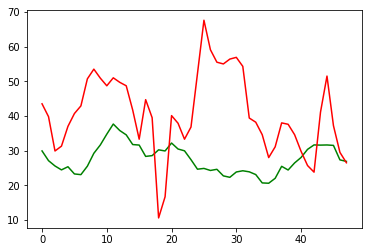

 54%|█████▍    | 7/13 [00:43<00:36,  6.15s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:47.5068	val-gamma-nloglik:75.2632	train-sMAPE:1.89353	val-sMAPE:1.94797
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.26326	val-gamma-nloglik:5.07401	train-sMAPE:0.405742	val-sMAPE:0.732927
[200]	train-gamma-nloglik:4.14744	val-gamma-nloglik:4.78616	train-sMAPE:0.238848	val-sMAPE:0.404245
[300]	train-gamma-nloglik:4.13185	val-gamma-nloglik:4.75673	train-sMAPE:0.193999	val-sMAPE:0.327725
[400]	train-gamma-nloglik:4.1239	val-gamma-nloglik:4.7474	train-sMAPE:0.168392	val-sMAPE:0.291796
[500]	train-gamma-nloglik:4.1189	val-gamma-nloglik:4.74872	train-sMAPE:0.150556	val-sMAPE:0.283366
[599]	train-gamma-nloglik:4.11541	val-gamma-nloglik:4.74679	train-sMAPE:0.136463	val-sMAPE:0.272811


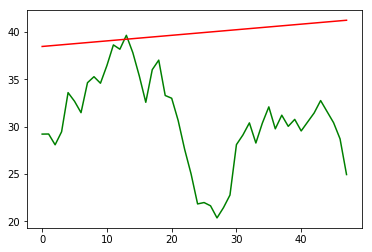

 62%|██████▏   | 8/13 [00:51<00:32,  6.49s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:39.9436	val-gamma-nloglik:66.8641	train-sMAPE:1.86454	val-sMAPE:1.93754
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.05988	val-gamma-nloglik:5.01935	train-sMAPE:0.414601	val-sMAPE:0.738408
[200]	train-gamma-nloglik:3.94168	val-gamma-nloglik:4.66521	train-sMAPE:0.238285	val-sMAPE:0.37111
[300]	train-gamma-nloglik:3.92628	val-gamma-nloglik:4.64474	train-sMAPE:0.199139	val-sMAPE:0.338341
[400]	train-gamma-nloglik:3.91847	val-gamma-nloglik:4.63442	train-sMAPE:0.175249	val-sMAPE:0.319608
[500]	train-gamma-nloglik:3.91324	val-gamma-nloglik:4.62793	train-sMAPE:0.158017	val-sMAPE:0.306511
[599]	train-gamma-nloglik:3.90957	val-gamma-nloglik:4.62267	train-sMAPE:0.144544	val-sMAPE:0.297543


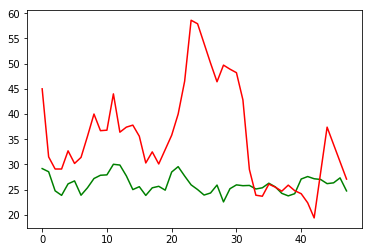

 69%|██████▉   | 9/13 [01:00<00:26,  6.75s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:33.6305	val-gamma-nloglik:69.384	train-sMAPE:1.84434	val-sMAPE:1.92044
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.87895	val-gamma-nloglik:5.33712	train-sMAPE:0.394507	val-sMAPE:0.866413
[200]	train-gamma-nloglik:3.77031	val-gamma-nloglik:4.86413	train-sMAPE:0.243393	val-sMAPE:0.683702
[300]	train-gamma-nloglik:3.7514	val-gamma-nloglik:4.82221	train-sMAPE:0.192929	val-sMAPE:0.659728
[400]	train-gamma-nloglik:3.74244	val-gamma-nloglik:4.79923	train-sMAPE:0.163194	val-sMAPE:0.648308
[500]	train-gamma-nloglik:3.73706	val-gamma-nloglik:4.78449	train-sMAPE:0.142164	val-sMAPE:0.64199
[599]	train-gamma-nloglik:3.73336	val-gamma-nloglik:4.77164	train-sMAPE:0.127098	val-sMAPE:0.63373


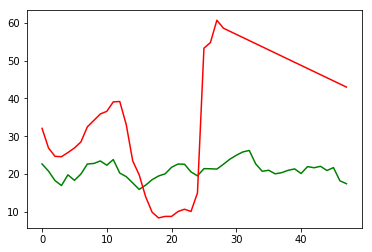

 77%|███████▋  | 10/13 [01:09<00:20,  6.95s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:48.882	val-gamma-nloglik:53.1991	train-sMAPE:1.83963	val-sMAPE:1.92603
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.19944	val-gamma-nloglik:4.54938	train-sMAPE:0.51668	val-sMAPE:0.565276
Stopping. Best iteration:
[117]	train-gamma-nloglik:4.10769	val-gamma-nloglik:4.50051	train-sMAPE:0.453788	val-sMAPE:0.498899



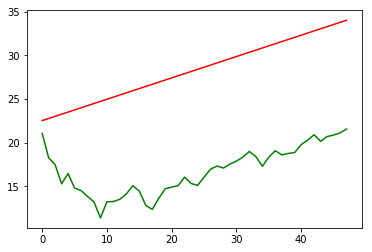

 85%|████████▍ | 11/13 [01:12<00:13,  6.56s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:51.7499	val-gamma-nloglik:63.614	train-sMAPE:1.90284	val-sMAPE:1.92939
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.35746	val-gamma-nloglik:4.72305	train-sMAPE:0.395357	val-sMAPE:0.515256
[200]	train-gamma-nloglik:4.24104	val-gamma-nloglik:4.53253	train-sMAPE:0.258096	val-sMAPE:0.335081
[300]	train-gamma-nloglik:4.2221	val-gamma-nloglik:4.52584	train-sMAPE:0.214746	val-sMAPE:0.329514
Stopping. Best iteration:
[275]	train-gamma-nloglik:4.22558	val-gamma-nloglik:4.524	train-sMAPE:0.223177	val-sMAPE:0.326344



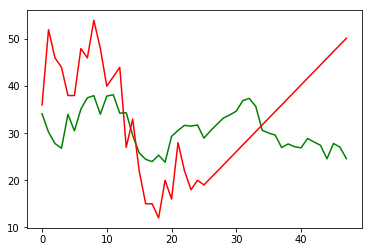

 92%|█████████▏| 12/13 [01:16<00:06,  6.42s/it]

(912, 2313)
(48, 2313)
[0]	train-gamma-nloglik:59.3485	val-gamma-nloglik:85.6953	train-sMAPE:1.91991	val-sMAPE:1.95158
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.5164	val-gamma-nloglik:5.15277	train-sMAPE:0.386681	val-sMAPE:0.659031
[200]	train-gamma-nloglik:4.38591	val-gamma-nloglik:4.87088	train-sMAPE:0.210861	val-sMAPE:0.289387
[300]	train-gamma-nloglik:4.37171	val-gamma-nloglik:4.84129	train-sMAPE:0.169473	val-sMAPE:0.217038
[400]	train-gamma-nloglik:4.36536	val-gamma-nloglik:4.83949	train-sMAPE:0.146829	val-sMAPE:0.205393
Stopping. Best iteration:
[352]	train-gamma-nloglik:4.36801	val-gamma-nloglik:4.83738	train-sMAPE:0.156544	val-sMAPE:0.203446



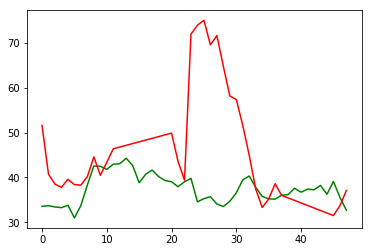

100%|██████████| 13/13 [01:22<00:00,  6.38s/it]


In [18]:
for i in tqdm(range(13)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,26:2185],train_data[:,2185+144*i:2185+144*(i+1)],train_data[:,-34:-26]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,26:2185],val_data[:,2185+144*i:2185+144*(i+1)],val_data[:,-34:-26]),axis = 1)
    trainY = train_data[:, -26+2*i+1]
    valY = val_data[:, -26+2*i+1]
    trainY[trainY <= 0] = 0.1
    valY[valY <= 0] = 0.1
#     trainY = London_train[:, -26+2*i+1]
#     valY = London_test[:, -26+2*i+1]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':2, # 构建树的深度，越大越容易过拟合
    'lambda':100,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':0.2, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/ld60/'+ str(i) +'_PM10.model') # 用于存储训练出的模型

# predict

In [94]:
import requests
for i in range(29,30):
    for j in range(5,12):
        end   = '2018-05-'+str(i).zfill(2)+'-'+str(j)
        url = 'http://kdd.caiyunapp.com/competition/forecast/bj/'+end+'/2k0d1d8'
        respones= requests.get(url)
        with open ('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
            f.write(respones.text)
        print('finished!')

finished!
finished!
finished!
finished!
finished!
finished!
finished!


In [95]:
for i in range(29,30):
    for j in range(0,12):
        end   = '2018-05-'+str(i).zfill(2)+'-'+str(j)
        url = 'http://kdd.caiyunapp.com/competition/forecast/ld/'+end+'/2k0d1d8'
        respones= requests.get(url)
        with open ('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
            f.write(respones.text)
        print('finished')

finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished


In [19]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import timedelta
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

def gen_dates(b_date, count):
    hour = timedelta(hours=1)
    for i in range(count+1):
        yield b_date + hour*i


def get_date_list(start=None, end=None):
    """
    获取日期列表
    :param start: 开始日期
    :param end: 结束日期
    :return:
    """
    if start is None:
        start = datetime.strptime("2000-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
    if end is None:
        end = datetime.now()
    data = []
    for d in gen_dates(start, int((end-start).total_seconds()/3600)):
        data.append(str(d))
    return data


Medium_PM10 = 88
Medium_PM25 = 59
Medium_O3   = 56
Medium_NO2  = 46
Medium_CO   = 1
Medium_SO2  = 9
def to_timedict_bj(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('stationId','utc_time','PM2.5','PM10','NO2','CO','O3','SO2'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration']]).tolist()
    for i in tqdm(['aotizhongxin', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihuayuan', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuiku', 'nansanhuan', 'nongzhanguan', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxigong','xizhimenbei','yanqin','yizhuang','yongdingmennei','yongledian','yufa','yungang']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.reset_index(drop=True,inplace=True)
#     recons.loc[recons['stationId'] == 'zhiwuyuan_aq',['PM2.5','PM10','NO2','CO','O3','SO2']] = [Medium_PM25,Medium_PM10,Medium_NO2,Medium_CO,Medium_O3,Medium_SO2]

#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons['PM2.5'].fillna(Medium_PM25, inplace = True)
    recons['PM10'].fillna(Medium_PM10, inplace = True)
    recons['NO2'].fillna(Medium_NO2, inplace = True)
    recons['CO'].fillna(Medium_CO, inplace = True)
    recons['O3'].fillna(Medium_O3, inplace = True)
    recons['SO2'].fillna(Medium_SO2, inplace = True)
    
    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['stationId']=='dongsi_aq',['lon','lat']] = [116.417,39.929]
    recons.loc[recons['stationId']=='tiantan_aq',['lon','lat']] = [116.407,39.886]
    recons.loc[recons['stationId']=='guanyuan_aq',['lon','lat']] = [116.339,39.929]
    recons.loc[recons['stationId']=='wanshouxigong_aq',['lon','lat']] = [116.352,39.878]
    recons.loc[recons['stationId']=='aotizhongxin_aq',['lon','lat']] = [116.397,39.982]
    recons.loc[recons['stationId']=='nongzhanguan_aq',['lon','lat']] = [116.461,39.937]
    recons.loc[recons['stationId']=='wanliu_aq',['lon','lat']] = [116.287,39.987]
    recons.loc[recons['stationId']=='beibuxinqu_aq',['lon','lat']] = [116.174,40.09]
    recons.loc[recons['stationId']=='zhiwuyuan_aq',['lon','lat']] = [116.207,40.002]
    recons.loc[recons['stationId']=='fengtaihuayuan_aq',['lon','lat']] = [116.279,39.863]
    recons.loc[recons['stationId']=='yungang_aq',['lon','lat']] = [116.146,39.824]
    recons.loc[recons['stationId']=='gucheng_aq',['lon','lat']] = [116.184,39.914]
    recons.loc[recons['stationId']=='fangshan_aq',['lon','lat']] = [116.136,39.742]
    recons.loc[recons['stationId']=='daxing_aq',['lon','lat']] = [116.404,39.718]
    recons.loc[recons['stationId']=='yizhuang_aq',['lon','lat']] = [116.506,39.795]
    recons.loc[recons['stationId']=='tongzhou_aq',['lon','lat']] = [116.663,39.886]
    recons.loc[recons['stationId']=='shunyi_aq',['lon','lat']] = [116.655,40.127]
    recons.loc[recons['stationId']=='pingchang_aq',['lon','lat']] = [116.23,40.217]
    recons.loc[recons['stationId']=='mentougou_aq',['lon','lat']] = [116.106,39.937]
    recons.loc[recons['stationId']=='pinggu_aq',['lon','lat']] = [117.1,40.143]
    recons.loc[recons['stationId']=='hureconsou_aq',['lon','lat']] = [116.628,40.328]
    recons.loc[recons['stationId']=='miyun_aq',['lon','lat']] = [116.832,40.37]
    recons.loc[recons['stationId']=='yanqin_aq',['lon','lat']] = [115.972,40.453]
    recons.loc[recons['stationId']=='dingling_aq',['lon','lat']] = [116.22,40.292]
    recons.loc[recons['stationId']=='badaling_aq',['lon','lat']] = [115.988,40.365]
    recons.loc[recons['stationId']=='miyunshuiku_aq',['lon','lat']] = [116.911,40.499]
    recons.loc[recons['stationId']=='donggaocun_aq',['lon','lat']] = [117.12,40.1]
    recons.loc[recons['stationId']=='yongledian_aq',['lon','lat']] = [116.783,39.712]
    recons.loc[recons['stationId']=='yufa_aq',['lon','lat']] = [116.3,39.52]
    recons.loc[recons['stationId']=='liulihe_aq',['lon','lat']] = [116,39.58]
    recons.loc[recons['stationId']=='qianmen_aq',['lon','lat']] = [116.395,39.899]
    recons.loc[recons['stationId']=='yongdingmennei_aq',['lon','lat']] = [116.394,39.876]
    recons.loc[recons['stationId']=='xizhimenbei_aq',['lon','lat']] = [116.349,39.954]
    recons.loc[recons['stationId']=='nansanhuan_aq',['lon','lat']] = [116.368,39.856]
    recons.loc[recons['stationId']=='dongsihuan_aq',['lon','lat']] = [116.483,39.939]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5','PM10','NO2','CO','O3','SO2']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
        
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 272:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    ######################处理缺失时间点完毕#####################shunyi_meo


    recons_meo = pd.DataFrame(columns=('station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather'))

    alt = np.array(meo[['station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    for i in tqdm(['shunyi_meo','hadian_meo','yanqing_meo','miyun_meo','huairou_meo','shangdianzi_meo','pinggu_meo','tongzhou_meo','chaoyang_meo','pingchang_meo','zhaitang_meo','mentougou_meo','beijing_meo','shijingshan_meo','fengtai_meo','daxing_meo','fangshan_meo','xiayunling_meo']):
        count = 0
        for j in meo['station_id']:
            if j == i:
                recons_meo.loc[count] = alt[count]
            count += 1 
    recons_meo.drop_duplicates(inplace=True)
    recons_meo.reset_index(drop=True,inplace=True)
    for i in range(len(recons_meo['wind_speed'])):
        if recons_meo['wind_speed'][i] == 999017:
            recons_meo.loc[i,'wind_speed'] = recons_meo.loc[i-1,'wind_speed']
    recons_meo['longitude'] = 0 ##经度
    recons_meo['latitude'] = 0  ##纬度
    recons_meo.loc[recons_meo['station_id']=='shunyi_meo',['longitude','latitude']] = [116.6153,40.12667]
    recons_meo.loc[recons_meo['station_id']=='haidian_meo',['longitude','latitude']] = [116.2906,39.98694]
    recons_meo.loc[recons_meo['station_id']=='yanqing_meo',['longitude','latitude']] = [115.9689,40.44944]
    recons_meo.loc[recons_meo['station_id']=='miyun_meo',['longitude','latitude']] = [116.8642,40.3775]
    recons_meo.loc[recons_meo['station_id']=='huairou_meo',['longitude','latitude']] = [116.6269,40.35778]
    recons_meo.loc[recons_meo['station_id']=='shangdianzi_meo',['longitude','latitude']] = [117.1117,40.65889]
    recons_meo.loc[recons_meo['station_id']=='pinggu_meo',['longitude','latitude']] = [117.1178,40.16944]
    recons_meo.loc[recons_meo['station_id']=='tongzhou_meo',['longitude','latitude']] = [116.7567,39.8475]
    recons_meo.loc[recons_meo['station_id']=='chaoyang_meo',['longitude','latitude']] = [116.5008,39.9525]
    recons_meo.loc[recons_meo['station_id']=='pingchang_meo',['longitude','latitude']] = [116.2117,40.22333]
    recons_meo.loc[recons_meo['station_id']=='zhaitang_meo',['longitude','latitude']] = [115.6922,39.97389]
    recons_meo.loc[recons_meo['station_id']=='mentougou_meo',['longitude','latitude']] = [116.1564,39.88778]
    recons_meo.loc[recons_meo['station_id']=='beijing_meo',['longitude','latitude']] = [116.4694,39.80611]
    recons_meo.loc[recons_meo['station_id']=='shijingshan_meo',['longitude','latitude']] = [116.2053,39.9425]
    recons_meo.loc[recons_meo['station_id']=='fengtai_meo',['longitude','latitude']] = [116.2453,39.87028]
    recons_meo.loc[recons_meo['station_id']=='daxing_meo',['longitude','latitude']] = [116.3544,39.71861]
    recons_meo.loc[recons_meo['station_id']=='fangshan_meo',['longitude','latitude']] = [116.1942,39.77306]
    recons_meo.loc[recons_meo['station_id']=='xiayunling_meo',['longitude','latitude']] = [115.7406,39.72861]

    recons_meo.loc[recons_meo['weather'] == 'Sunny/clear' , 'weather'] = 0
    recons_meo.loc[recons_meo['weather'] == 'Snow' , 'weather'] = 1
    recons_meo.loc[recons_meo['weather'] == 'Sleet' , 'weather'] = 2
    recons_meo.loc[recons_meo['weather'] == 'Sand' , 'weather'] = 3
    recons_meo.loc[recons_meo['weather'] == 'Rain/Snow with Hail' , 'weather'] = 4
    recons_meo.loc[recons_meo['weather'] == 'Rain with Hail' , 'weather'] = 5
    recons_meo.loc[recons_meo['weather'] == 'Rain' , 'weather'] = 6
    recons_meo.loc[recons_meo['weather'] == 'Haze' , 'weather'] = 7
    recons_meo.loc[recons_meo['weather'] == 'Fog' , 'weather'] = 8
    recons_meo.loc[recons_meo['weather'] == 'Dust' , 'weather'] = 9
    recons_meo.loc[recons_meo['weather'] == 'Hail' , 'weather'] = 4
    recons_meo.loc[recons_meo['weather'] == 'Cloudy' , 'weather'] = 0
    recons_meo.loc[recons_meo['weather'] == 'Overcast' , 'weather'] = 0
    recons_meo.loc[recons_meo['weather'] == 'Thundershower' , 'weather'] = 6
    recons_meo.loc[recons_meo['weather'] == 'Light Rain' , 'weather'] = 6
    
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    recons_meo['temperature'] = recons_meo['temperature'].apply(div5)
    recons_meo['pressure'] = recons_meo['pressure'].apply(div5)
    recons_meo['humidity'] = recons_meo['humidity'].apply(div5)
    recons_meo['wind_direction'] = recons_meo['wind_direction'].apply(div15)
    recons_meo['wind_speed'] = recons_meo['wind_speed'].apply(div05)
    #############wether量化###############

    #############处理缺失时间点##########
    count = 0
    Idx = 0  ####索引记录####
    meo_list = np.array(recons_meo[['temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    

    for i in tqdm(np.array(recons_meo['time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(meo_list[Idx])

        Idx += 1
        
    length = []  
    
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0]) != 12  and int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    ######################处理缺失时间点完毕#####################
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(1150,1181,1):
        for j in range(390,411,1):
            if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                meo_grid.loc[meo_grid['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                 print([i,j])
            count += 1
    
    meo_grid.drop(meo_grid[meo_grid['longitude'] < 115.6].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] > 117.2].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 39.5].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 40.7].index.tolist(),inplace= True)
    meo_grid.drop('id',axis = 1)
    meo_grid.drop_duplicates(inplace=True)
    meo_grid.reset_index(drop=True,inplace=True)
#     print(meo_grid.head(100))
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
    
    
    
    
    count = 1
    Idx = 0  ####索引记录####

    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 9:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1])
            if count > 9:
                for j in range(count-9):
                    alt_dict[i].extend(meo_grid_list[Idx+1])
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
        
        
        
        
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1485:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) != 1485:
                if int(k.split(' ')[1].split(':')[0]) != 0 and int(k.split(' ')[1].split(':')[0]) != 12:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
            
            
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(1150,1181,1):
            for j in range(390,411,1):
                if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                    weather_fore.loc[weather_fore['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < 115.6].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 117.2].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 39.5].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 40.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 12093:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(12093-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(1485,12093))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))])
            alt_dict[i][1485:12093] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))]).tolist()
        count += 1
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 16
#     win = 168
    
    for i in tqdm(range(68,272)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 271:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,10,11,12]: #####是否为早晚高峰时段（北京转utc时间）
                        alt_dict[alt_frame.index[count]].extend([2])
                    elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [16,17,18,19,20]:
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,6):
            SUM = 0
            for j in range(0,34):
                SUM += alt_dict[k][68+j*6+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0,0,0,0])
        else:
            for m,n in zip(alt_dict[k][-6:] ,alt_dict[hour_last][-12:-6]):
                alt_dict[k].append(m-n)

        hour_last = k
        count += 1
#     ##########标签值 PM10 PM2.5 O3##########
#     step = 72  ####预测间隔
#     for i in tqdm(range(272)):  ##训练数据
#         count = 0
#         for j in alt_frame[i]:
#             if count+step < len(alt_frame[i]) and (i%8 == 0 or i%8 == 1 or i%8 == 4):
#                 alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
#             count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 4973:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i]) <  max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [20]:
Start = datetime.strptime("2018-05-25 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-28 23:00:00", "%Y-%m-%d %H:%M:%S")

pre_dict_bj = to_timedict_bj(start = Start, end = End)
pre_frame_bj = pd.DataFrame.from_dict(pre_dict_bj).T
pre_list_bj = np.array(pre_frame_bj)

  0%|          | 0/18 [00:00<?, ?it/s]

272
272


100%|██████████| 1700/1700 [00:00<00:00, 1684459.44it/s]


380
272
380
380


  0%|          | 0/96 [00:00<?, ?it/s]

1485
380
1485
380


 26%|██▋       | 54/204 [00:00<00:00, 262.38it/s]

12093
380


100%|██████████| 96/96 [00:00<00:00, 32693.50it/s]

21900
12105
21900
21900


In [21]:
pre_list_bj.shape

(48, 21900)

# LondonPre

In [22]:
Medium_PM10 = 13.437369
Medium_PM25 = 20.921357
Medium_O3   = 43.428245

def to_timedict_ld(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Predict/ld_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Predict/ld_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid.drop('id',axis=1, inplace = True)
    meo_grid.drop_duplicates(inplace = True)
    meo_grid.reset_index(drop = True, inplace =True)
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('station_id','MeasurementDateGMT','PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration']]).tolist()
    for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.drop_duplicates(inplace = True)
    recons.reset_index(drop=True,inplace=True)
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['station_id'] == 'TH4' , 'NO2 (ug/m3)'])
    recons['PM2.5 (ug/m3)'].fillna(Medium_PM25, inplace = True)
    recons['PM10 (ug/m3)'].fillna(Medium_PM10, inplace = True)
    recons['NO2 (ug/m3)'].fillna(Medium_NO2, inplace = True)

    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='CD9',['lon','lat']] = [-0.129053205,51.52770662]
    recons.loc[recons['station_id']=='CD1',['lon','lat']] = [-0.175284,51.544219]
    recons.loc[recons['station_id']=='GN0',['lon','lat']] = [0.074003,51.490532]
    recons.loc[recons['station_id']=='GR4',['lon','lat']] = [0.070766,51.45258]
    recons.loc[recons['station_id']=='GN3',['lon','lat']] = [0.095111,51.486957]
    recons.loc[recons['station_id']=='GR9',['lon','lat']] = [0.040725,51.456357]
    recons.loc[recons['station_id']=='HV1',['lon','lat']] = [0.205460706,51.52078746]
    recons.loc[recons['station_id']=='KF1',['lon','lat']] = [-0.21349214,51.52104675]
    recons.loc[recons['station_id']=='LW2',['lon','lat']] = [-0.039641,51.474954]
    recons.loc[recons['station_id']=='ST5',['lon','lat']] = [-0.141661525,51.3892869]
    recons.loc[recons['station_id']=='TH4',['lon','lat']] = [-0.008418493,51.51504617]
    recons.loc[recons['station_id']=='MY7',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.15459,51.52254]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))

    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(-20,21,1):
        for j in range(505,526,1):
            if (i >= -4 and i <=3) and (j >= 513 and j <= 517):
                meo_grid.loc[meo_grid['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
            count += 1
    print(meo_grid)
    meo_grid.drop(meo_grid[meo_grid['longitude'] < -0.4].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] >  0.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 51.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 51.7].index.tolist(),inplace= True)
    meo_grid.reset_index(drop = True,inplace = True)
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
    print(meo_grid)
    count = 1
    Idx = 0  ####索引记录####
#     print(meo_grid['station_id'][15561])
    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 17:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1]) 
            if count > 17:
                for j in range(count-17):
                    alt_dict[i].extend(meo_grid_list[Idx+1]) 
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 2217:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0])!= 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(-20,21,1):
            for j in range(505,526,1):
                if (i >= -4 and i <= 3) and (j >= 513 and j <= 517):
                    weather_fore.loc[weather_fore['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < -0.4].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 0.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 51.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 51.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 2185:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(2185-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(265,2185))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))])
            alt_dict[i][265:2185] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))]).tolist()
        count += 1
#     print(alt_frame[62])
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 168

    for i in tqdm(range(26,65)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 64:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
#                     if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [8,9,10,18,19,20]: #####是否为早晚高峰时段（北京转utc时间）
#                         alt_dict[alt_frame.index[count]].extend([2])
#                     elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,3,4,5]:
#                         alt_dict[alt_frame.index[count]].extend([1])
#                     else:
#                         alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,3):
            SUM = 0
            for j in range(0,13):
                SUM += alt_dict[k][26+j*3+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0])
        else:
            for m,n in zip(alt_dict[k][-3:] ,alt_dict[hour_last][-6:-3]):
                alt_dict[k].append(m-n)
        hour_last = k
        count += 1
#     ##########标签值 PM10 PM2.5 O3##########
#     step = 72
#     for i in tqdm(range(65)):  ##训练数据
#         count = 0
#         for j in alt_frame[i]:
#             if count+step < len(alt_frame[i]) and (i%5 == 0 or i%5 == 1):
#                 alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
#             count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 6092:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
            
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i])<max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [23]:
pre_dict_ld = to_timedict_ld(start = Start, end = End)
pre_frame_ld = pd.DataFrame.from_dict(pre_dict_ld).T
pre_list_ld = np.array(pre_frame_ld)

100%|██████████| 1248/1248 [00:00<00:00, 1723005.72it/s]


65
65
65
65


  0%|          | 0/96 [00:00<?, ?it/s]

            station_id                 time            weather  temperature  \
0      london_grid_000  2018-05-25 00:00:00             CLOUDY        13.61   
1      london_grid_001  2018-05-25 00:00:00             CLOUDY        13.44   
2      london_grid_002  2018-05-25 00:00:00             CLOUDY        13.26   
3      london_grid_003  2018-05-25 00:00:00               RAIN        13.14   
4      london_grid_004  2018-05-25 00:00:00               RAIN        13.08   
5      london_grid_005  2018-05-25 00:00:00               RAIN        13.01   
6      london_grid_006  2018-05-25 00:00:00               RAIN        12.75   
7      london_grid_007  2018-05-25 00:00:00               RAIN        12.48   
8      london_grid_008  2018-05-25 00:00:00               RAIN        12.10   
9      london_grid_009  2018-05-25 00:00:00               RAIN        11.58   
10     london_grid_010  2018-05-25 00:00:00               RAIN        11.07   
11     london_grid_011  2018-05-25 00:00:00         

100%|██████████| 96/96 [00:00<00:00, 69880.80it/s]


2185
65
4065
2191
4065
4065


In [24]:
pre_list_ld.shape

(48, 4065)

In [25]:
import xgboost as xgb

date_submit = '2018-5-31_big_old_120'
submit = pd.read_csv('/home/lifuzhen/KDD2018/sample_submissioin.csv')
##########北京##############
count = 0
for i in tqdm(['aotizhongx', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihua', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuik', 'nansanhuan', 'nongzhangu', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxig','xizhimenbe','yanqin','yizhuang','yongdingme','yongledian','yufa','yungang']):
    for j in ['PM2.5','PM10','O3']:
        model = xgb.Booster(model_file='/home/lifuzhen/KDD2018/Mini_train/bj60/'+str(count)+'_'+j+'.model')
        if j == 'PM2.5':
            for k in range(48):
                alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,2*count:2*(count+1)],pre_list_bj[:,68:12093],pre_list_bj[:,12093+count*288:12093+(count+1)*288],pre_list_bj[:,-15:]),axis = 1)))
                submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
        elif j == 'PM10':
            for k in range(48):
                alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,2*count:2*(count+1)],pre_list_bj[:,68:12093],pre_list_bj[:,12093+count*288:12093+(count+1)*288],pre_list_bj[:,-15:]),axis = 1)))
                submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
        else:
            for k in range(48):
                alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,68+6*count+4:68+6*count+5],pre_list_bj[:,-13:-12],pre_list_bj[:,-8:-7],pre_list_bj[:,-2:-1]),axis = 1)))
                submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
    count += 1
###########伦敦################
count = 0
for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
    for j in ['PM2.5','PM10']:
        model = xgb.Booster(model_file='/home/lifuzhen/KDD2018/Mini_train/ld60/'+str(count)+'_'+j+'.model')
        for k in range(48):
            alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_ld[:,2*count:2*(count+1)],pre_list_ld[:,26:2185],pre_list_ld[:,2185+count*144:2185+(count+1)*144],pre_list_ld[:,-8:]),axis = 1)))
            submit.loc[submit['test_id'] == i + '#' + str(k) , j] = alt[k]
    count += 1
submit.to_csv('/home/lifuzhen/KDD2018/Result/result_Mini_'+date_submit+'.csv',index=False)

100%|██████████| 13/13 [00:04<00:00,  2.60it/s]


In [10]:
o = []
m = [1,2]
n = [3,4]
o.append(m)
o.append(n)
print(o)
a,b = tuple(o)
print(a)
print(b)

[[1, 2], [3, 4]]
[1, 2]
[3, 4]
